In [149]:
## DATA SETUP
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style


import warnings
warnings.filterwarnings('ignore')

In [68]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')
sns.set(style = "white", font_scale = 1.5)

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

In [69]:
df = pd.read_csv('cogs13_finalproj.csv')
df.head()

,Coder,Location,Date,Time,...,Meal,Multitasking,Phone Placement,Phone Usage
0,Angela,Pines,03-04,15:20,...,lunch,phone,hand,app
1,Angela,Pines,03-04,15:22,...,lunch,phone,hand,app
2,Angela,Pines,03-04,15:24,...,lunch,phone,hand,app
3,Angela,Pines,03-04,15:26,...,lunch,work,up,no
4,Angela,Pines,03-04,15:28,...,lunch,social,none,na


#### **H1**: Students eating *alone* are *more likely to engage with their phones*, whereas those dining *with others* are *more likely to place their phones face-down or put them away*. 

#### **H2**: Students dining *alone* will show *higher instances of multitasking* (e.g., studying, watching a show) compared to those in groups.

In [70]:
df.shape

(76, 9)

In [71]:
print(df.isnull().sum())

Coder              0
Location           0
Date               0
Time               0
                  ..
Meal               0
Multitasking       0
Phone Placement    0
Phone Usage        0
Length: 9, dtype: int64


In [72]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['coder', 'location', 'date', 'time', 'party', 'meal', 'multitasking',
       'phone placement', 'phone usage'],
      dtype='object')


In [73]:
df['party'].unique()

array([1, 3, 2, 4, 5])

In [74]:
# Make party into categorical variable
def standardize_party(x):
    if x == 1:
        return 'alone'
    else: 
        return 'group'
            
        

In [75]:
print(standardize_party(1))
print(standardize_party(2))

alone
group


In [76]:
df['party_cat'] = df['party'].apply(standardize_party)
df.head()

,coder,location,date,time,...,multitasking,phone placement,phone usage,party_cat
0,Angela,Pines,03-04,15:20,...,phone,hand,app,alone
1,Angela,Pines,03-04,15:22,...,phone,hand,app,alone
2,Angela,Pines,03-04,15:24,...,phone,hand,app,group
3,Angela,Pines,03-04,15:26,...,work,up,no,alone
4,Angela,Pines,03-04,15:28,...,social,none,na,group


In [77]:
df.describe()

,party
count,76.00
mean,1.62
std,0.86
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,5.00


In [78]:
party_counts = df['party'].value_counts()
party_cat_counts = df['party_cat'].value_counts()
print(party_counts, party_cat_counts)
# With this results, we can note that there is an 8 observation difference between how many solo parties were recorded vs grouped.

party
1    42
2    26
3     4
4     3
5     1
Name: count, dtype: int64 party_cat
alone    42
group    34
Name: count, dtype: int64


In [79]:
party_pplace = df.groupby('party_cat')['phone placement'].value_counts()
party_pplace

party_cat  phone placement
alone      up                 14
           hand               13
           none                9
           down                3
                              ..
group      hand                8
           down                7
           up                  7
           propped             1
Name: count, Length: 11, dtype: int64

In [80]:
party_multi = df.groupby('party_cat')['multitasking'].value_counts()
party_multi

party_cat  multitasking
alone      phone           19
           work            15
           eat              5
           reading          2
                           ..
group      social          20
           eat              6
           phone            6
           work             2
Name: count, Length: 9, dtype: int64

In [145]:
time_df = df.sort_values(by='time').reset_index(drop = True)
time_df.head()

,coder,location,date,time,...,multitasking,phone placement,phone usage,party_cat
0,Angela,Pines,03-04,15:20,...,phone,hand,app,alone
1,Charlize,Pines,03-04,15:20,...,phone,hand,app,alone
2,Charlize,Pines,03-04,15:22,...,work,na,no,alone
3,Angela,Pines,03-04,15:22,...,phone,hand,app,alone
4,Angela,Pines,03-04,15:24,...,phone,hand,app,group


In [159]:
# Chunking times
block_df = time_df.iloc[0:19]
block_df['time_block'] = 1
block_df1 = time_df.iloc[19:38]
block_df1['time_block'] = 2
block_df2 = time_df.iloc[38:57]
block_df2['time_block'] = 3
block_df3 = time_df.iloc[57:76]
block_df3['time_block'] = 4

# Joining back into one large dataframe with blocks

blocks = [block_df, block_df1, block_df2, block_df3]
df_block = pd.concat(blocks)
df_block

,coder,location,date,time,...,phone placement,phone usage,party_cat,time_block
0,Angela,Pines,03-04,15:20,...,hand,app,alone,1
1,Charlize,Pines,03-04,15:20,...,hand,app,alone,1
2,Charlize,Pines,03-04,15:22,...,na,no,alone,1
3,Angela,Pines,03-04,15:22,...,hand,app,alone,1
...,...,...,...,...,...,...,...,...,...
72,Angela,Sixth,03-04,17:06,...,up,video,alone,4
73,Angela,Sixth,03-04,17:08,...,down,no,group,4
74,Angela,Sixth,03-04,17:10,...,up,na,group,4
75,Angela,Sixth,03-04,17:12,...,hand,app,alone,4


In [172]:
df.groupby(['party_cat','multitasking'])['phone usage'].value_counts()

party_cat  multitasking  phone usage
alone      eat           na             3
                         no             1
                         video          1
           other         check          1
                                       ..
group      social        no             6
                         app            3
                         check          2
           work          na             2
Name: count, Length: 24, dtype: int64

In [173]:
df.groupby(['party_cat','phone placement'])['phone usage'].value_counts()

party_cat  phone placement  phone usage
alone      down             check          2
                            no             1
           hand             app            9
                            call           2
                                          ..
group      propped          app            1
           up               no             5
                            na             1
                            video          1
Name: count, Length: 23, dtype: int64

<function matplotlib.pyplot.gcf() -> 'Figure'>

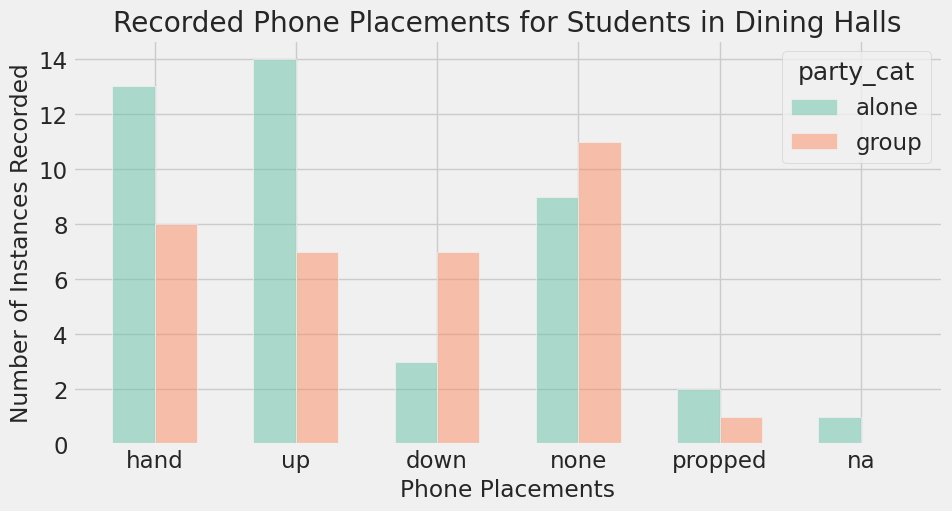

In [160]:
# FIGURE 1
# Check which phone placement was most used between different groups
fig1 = sns.histplot(data = df, x = 'phone placement', hue = 'party_cat', palette = "Set2", alpha = 0.5, multiple = "dodge", shrink = 0.6)
fig1.set_title("Recorded Phone Placements for Students in Dining Halls")
fig1.set_ylabel('Number of Instances Recorded')
fig1.set_xlabel('Phone Placements')
plt.gcf

<function matplotlib.pyplot.gcf() -> 'Figure'>

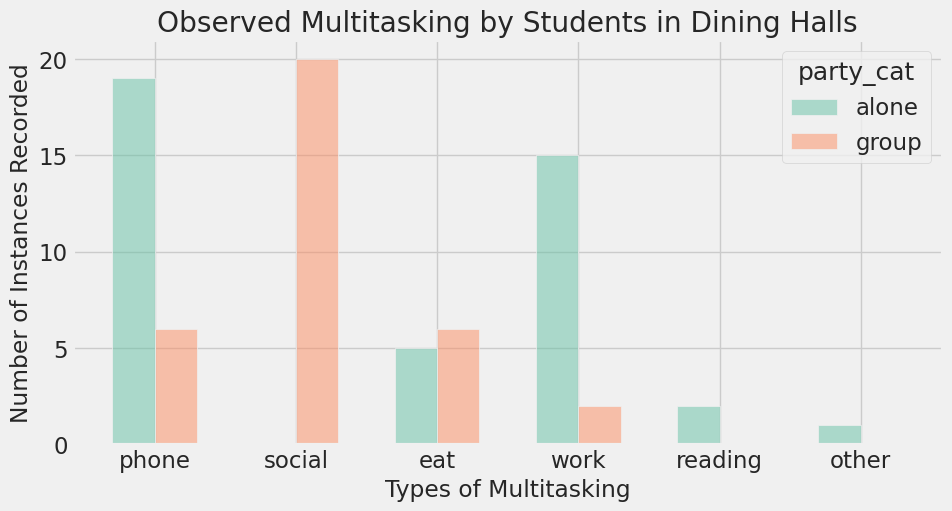

In [161]:
# FIGURE 2
# Check what form of multitasking was occuring the most between different groups.
fig2 = sns.histplot(data = df, x = 'multitasking', hue = 'party_cat', palette = "Set2", alpha = 0.5, multiple = "dodge", shrink = 0.6)
fig2.set_title("Observed Multitasking by Students in Dining Halls")
fig2.set_ylabel('Number of Instances Recorded')
fig2.set_xlabel('Types of Multitasking')
plt.gcf

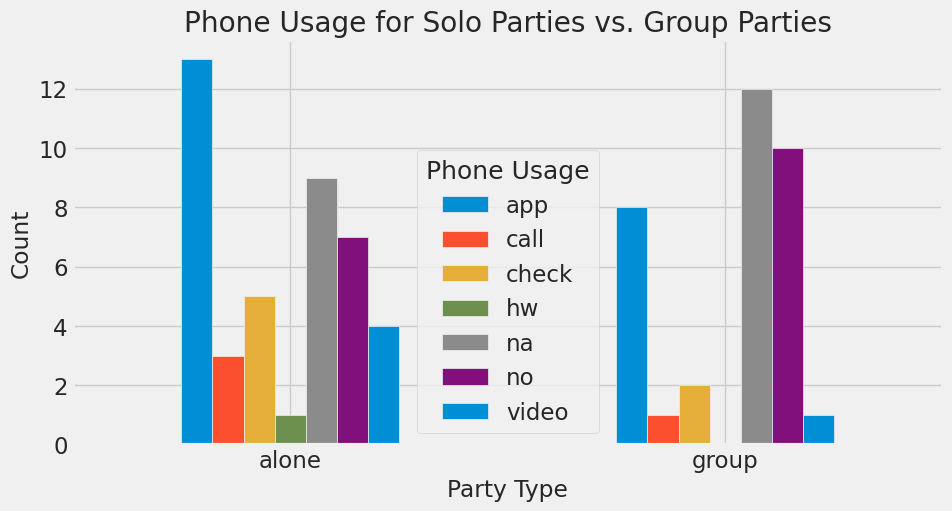

In [185]:
# FIGURE 3
# Check what form of multitasking was occuring the most between different groups.
# fig3 = sns.histplot(data = df, x = 'phone usage', hue = 'party_cat', palette = "Set2", alpha = 0.5, multiple = "dodge", shrink = 0.6)
# fig3.set_title("Observed Multitasking by Students in Dining Halls")
# fig3.set_ylabel('Number of Instances Recorded')
# fig3.set_xlabel('Types of Multitasking')
# plt.gcf
grouped_data = df.groupby(['party_cat','phone usage']).size().unstack()
grouped_data.plot(kind='bar', rot=0)
# Add labels and title
plt.xlabel('Party Type')
plt.ylabel('Count')
plt.title('Phone Usage for Solo Parties vs. Group Parties')
plt.legend(title='Phone Usage')

# Show the plot
plt.show()

In [162]:
prop_df = df.groupby('party_cat')['phone placement'].value_counts(normalize = True).rename('proportion').reset_index()
prop_df

,party_cat,phone placement,proportion
0,alone,up,0.33
1,alone,hand,0.31
2,alone,none,0.21
3,alone,down,0.07
...,...,...,...
7,group,hand,0.24
8,group,down,0.21
9,group,up,0.21
10,group,propped,0.03


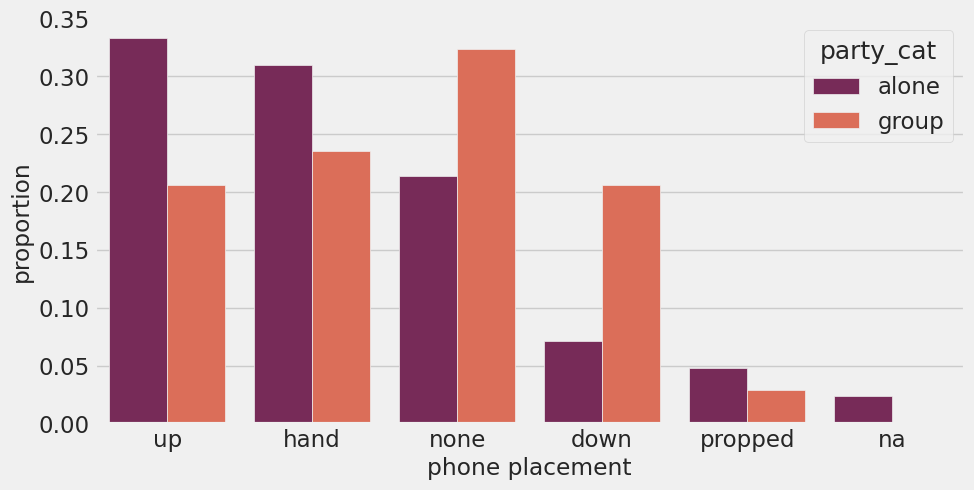

In [163]:
plot_prop = sns.barplot(x = 'phone placement', y = 'proportion', hue = 'party_cat', data = prop_df, palette = 'rocket')

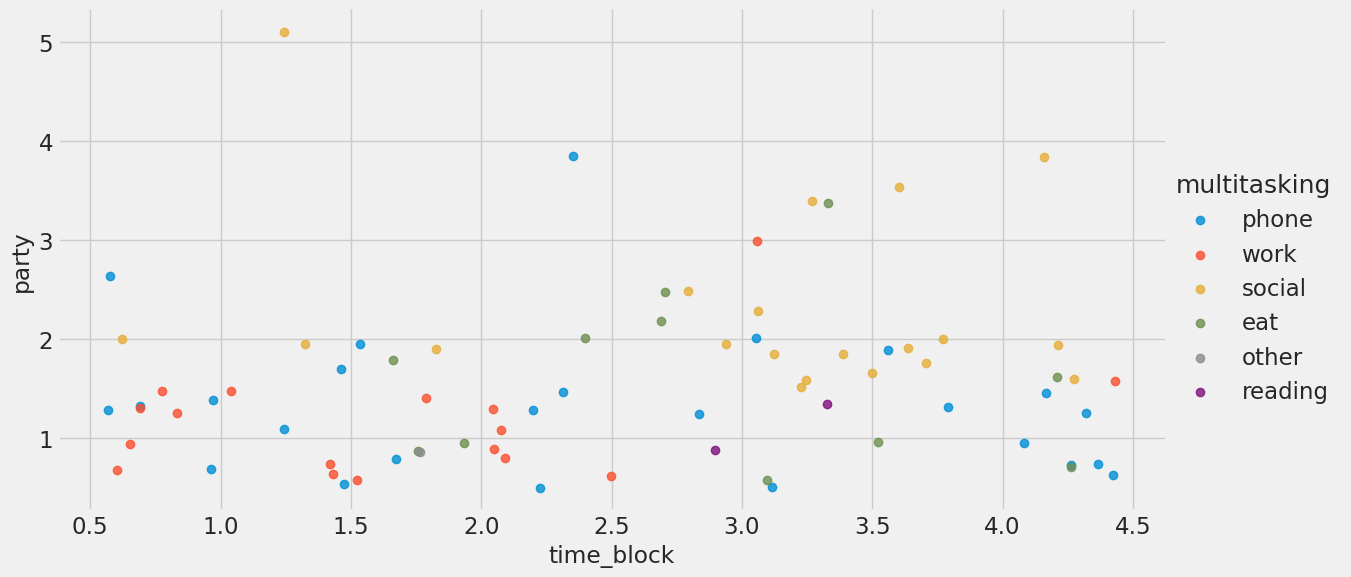

In [168]:
# sns.lineplot(data = df_block, x = 'blocdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA84AAAHqCAYAAADVtxdRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAACCBElEQVR4nOzdeUCU5f7//9ewCYiKooIooJJGmklqaJZaejxpVi55KjOXcinTlk+aaWmu6bFO2mJZbuebu1kupbmUecrMDXdQPJoIIiiCIiI7zO8PfzNHYpjAGWDA5+Mf5b6v+7re9801w7znuu7rNqSkpBgFAAAAAAAscirvAAAAAAAAcGQkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVJM4AAAAAAFhB4gwAAAAAgBUkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABY4VLeAZREeHi4li9frsjISGVkZMjPz09dunTRoEGD5OHhUaK6du7cqd27dysqKkqJiYlKSUmRs7Oz6tWrp7CwMPXr10/16tWzeGzPnj2VkJDwl/VXqVKlRDEBAAAAAByPISUlxVjeQRTH6tWrNXv2bBmNRtWtW1c1a9ZUdHS0srOz1ahRI82fP181atQodn0vvfSSDh48KBcXF9WuXVs1a9ZUSkqKLl68qPz8fLm7u+v9999Xu3btCh1rSpyDg4Pl5eVlsf7PP/9crq6ut3y+AAAAAADHUCES5xMnTuj555+X0WjUuHHj1KtXLxkMBl26dEmjR49WVFSUHn74Yc2aNavYdW7atEl16tRRaGio3NzczNvj4uI0bdo0HTp0SN7e3tqwYUOh0WxT4jxv3jy1bt3abucJAAAAAHA8FeIe50WLFik/P1/du3dX7969ZTAYJEl16tTR9OnT5eTkpB07dujUqVPFrrNHjx4KCwsrkDRLUoMGDTRjxgxJUkpKig4dOmS/EwEAAAAAVDgOnzinp6drz549kqTevXsX2h8YGKg2bdpIkrZv326XNn18fFS9enVJUmZmpl3qBAAAAABUTA6/ONjJkyeVnZ0tNzc3NW/e3GKZ0NBQ7du3TxEREXZpMzo6WqmpqXJyctKdd95ZZLm1a9dq2bJlysrKko+Pj0JDQ9WtWzdVrVrVLnEAAAAAAMqfwyfOsbGxkiRfX1+5uFgOt0GDBpKkmJiYW27HaDTqypUrOnLkiObOnStJ6t+/v+rXr1/kMT/++GOBn7du3aovv/xS06ZNU9u2bW85FgAAAACA43D4xDk1NVWSrK6YbZpWfe3atRLXv3nzZk2aNKnAtoYNG2rq1Knq1q2bxWNatGih559/XqGhofLz81NOTo4OHz6s+fPn6+TJkxozZowWLFigkJCQEscDAAAAAHAsDn+Pc3Z2tiQVOdosyfzYp6ysrBLXX7NmTbVs2VItWrSQr6+vnJycFBsbq61bt+rixYsWj5k+fbp69eqlhg0byt3dXdWqVVOHDh3MyXJWVpZ51BoAAAAAULE5/IizadXr3NzcIsvk5ORIkqpUqVLi+tu1a1fgWc3nz5/XRx99pF9++UVDhgzRqlWrinxW85+5u7trxIgReu211xQeHq5r166pWrVqJY4JAAAAAOA4HH7E2ZR4Xr16tcgypunc9khS69evr3/+859q3LixEhMT9fXXX5fo+BYtWkiS8vPzFRcXZ3M8AAAAAIDy5fCJc2BgoCTp4sWLRY46mxJUU1lbOTs7q3379pKkEydOlOhY07RxScrLy7NLPAAAAACA8uPwiXNISIhcXV2VnZ2tyMhIi2UOHz4s6X+jvfZgStKNRmOJjvvjjz/M/69Tp47d4gEAAAAAlA+HT5w9PT3N9yCvW7eu0P7Y2FiFh4dLkjp37myXNnNycvTbb79Jkpo2bVqiY5cuXSpJatSokXx9fe0SDwAAAACg/Dh84ixJQ4YMkcFg0ObNm7Vu3TrzKHBSUpImTJig/Px8derUqVCSO2zYMPXs2VMrV64ssP348eP64osvzM+IvllMTIzeeOMNxcXFydPTU7169Sqwf9myZVq9erVSUlIKbE9JSdHMmTO1fft2SdLw4cNtPGsAAAAAgCMwpKSklGwucjlZuXKlPvroIxmNRvn6+srb21vR0dHKzs5WUFCQFixYIG9v7wLH9OzZUwkJCRo6dGiBRPbAgQMaMWKEpBuPo/L19ZWLi4uSkpJ04cIFSTeeDT1z5kzdd999BeqcPXu2Vq1aJYPBoHr16qlmzZrKyspSdHS08vLy5OTkpJdfflkDBw4s3QsCAAAAACgTDv84KpN+/fopODhYK1asUEREhK5cuSI/Pz917txZgwcPlqenZ7HratKkiUaPHq2DBw/q9OnTOnfunDIzM+Xl5aWWLVvq/vvvV58+fQol4pLUtWtXGY1GRUZG6uLFizp16pScnJxUv359tWrVSn379i3x9G4AAAAAgOOqMCPOAAAAAACUhwpxjzMAAAAAAOWlwkzVBgAAAFB55eTkKD09XdnZ2eUdCiogg8EgDw8PeXp6ymAw2L9+pmoDAAAAKE/Xr19XRkaGqlWrJjc3t1JJfFC55efn6/r168rJyVHNmjXt3oeYqg0AAACg3OTk5CgjI0M+Pj6qUqUKSTNuiZOTk6pVqyZnZ2dlZmbav3671wgAAAAAxZSenq5q1aqRMMMuPD09SZwBAAAAVC7Z2dlyc3Mr7zBQSbi4uCg3N9fu9ZI4AwAAAChXjDbDXkqrL5E4AwAAAABgBYkzAAAAAABW8BznCigt+aqy0jLKO4xSV8XLQ14+Nco7DAAAAAC3ORLnCigrLUPzn51c3mGUuuErJpM4AwAAACh3TNUGAAAAAMAKRpwBAAAAoJTFx8dr48aNkqThw4eXczTlp6JeB0acAQAAAKCUJSQkaOHChVq4cGF5h1KuKup1IHEGAAAAAMAKEmcAAAAAAKzgHmcAAAAAFd5LL72kgwcPaujQoXr++ee1YsUKbd26VXFxcXJ1ddVdd92lZ599Vu3bty907OXLl/Xbb7/pt99+09mzZ3Xp0iXl5uaqTp06atWqlfr166fg4GCL7U6ZMkWbNm1Sjx499O6772rDhg3atGmToqOjlZqaqnfffVcLFixQQkKC+ZiwsLACdfTo0UOTJk3SCy+8oIiICD355JN66623ijzXffv2adSoUTIYDFq7dq3q169/i1fthvz8fG3fvl1bt27ViRMnlJKSoqpVq8rPz09hYWHq3r17gfPPzc3VgQMHtHPnTh09elSXLl3S1atXVa1aNTVt2lSPPfaY/v73v8tgMBRop2fPnsW6Do6IxBkAAABApZGbm6uRI0fq8OHDcnZ2lqenp65du6Z9+/Zp3759Gjp0aKFFqT799FNt2rTJ/HPVqlWVm5uruLg4xcXFacuWLZo6dao6d+5cZLtGo1Hjx4/Xzz//LCcnJ3l5ecnJ6cYEX29vb12/fl2pqamSpFq1ahU41svLS5LUp08fRUREaMuWLXrttdfk7u5usa0NGzZIupF42po0p6Sk6K233tKhQ4cKxJOWlqaoqChFRUXp7Nmz+te//mXef+TIEb3yyivmn93c3OTm5qYrV65o79692rt3r/7zn//ovffeM1+DklwHR0TiDAAAAKDS+Oabb5Sdna1x48apR48eqlKlii5evKg5c+bo559/1sKFCxUSEqKOHTuaj/H399cLL7ygzp07KyAgQB4eHsrPz1d0dLS++uorbdmyRVOmTFGLFi1Up04di+3+5z//UVZWll577TX17NlTXl5eSk9PV3p6uh577DEdOHBAI0aMkCRt2bLFYh1/+9vf9NFHHyk1NVU//vijHn/88UJlUlJS9J///EeS1Lt3b5uuVW5urt58800dOXJEbm5uGj58uB5//HHVrFlTeXl5unjxovbu3VtglFiSqlSpokceeUTdunVTSEiIatWqJYPBoKtXr2rLli364osvtH37doWGhurpp582H/fVV18V6zo4Iu5xBgAAAFBppKWlaezYserTp4+qVKkiSfL19dWMGTN07733SpI+++yzAscMGzZML730kpo2bSoPDw9JkpOTk4KDgzV16lQ98MADysjI0HfffVdku+np6Xr99dfVv39/88ipp6enateuXezY3d3d9eijj0qS1q1bZ7HMpk2blJOTo1q1ahVI/m/Fpk2bdOTIERkMBs2aNUsDBw5UzZo1JUnOzs7y9/dX79699fLLLxc47u6779a0adP0wAMPyMfHxzwlu0aNGnr66ac1YcIESdLq1attis+RMOIMAEAR8tJSZcxIL+8wSp3Bw1POXtXLOwwAsAtfX1+LI7VOTk564YUX9Morryg6OlqnT5/WHXfcUaw6H3jgAe3atUtHjhwpskz16tXVp0+fW47b5Mknn9SqVasUERFhMUbTNO0nnnhCLi62pXPff/+9JKl9+/Z64IEHbKrrZqa64uLilJSUVKIvDxwViTMAAEUwZqTryqdTyjuMUlfzlUkSiTOASqJVq1aFFqUyuffee+Xs7Ky8vDydOHGiQFL63//+V+vWrdORI0eUkJCg9PR0GY3GAscnJiYW2e5dd90lV1dXm+MPCgpS69atdeDAAa1fv15jxowx7zt06JDOnj0rg8Ggnj172tRObm6ujh8/Lknq0KFDiY+/fv261q5da15Q7dq1a8rNzS1ULjExkcQZAAAAABxJ3bp1i9zn5uamGjVq6PLly7p8+bJ5+9dff63Zs2crPz9fkmQwGOTl5WVOhLOysnT9+nVlZGQUWfefF7qyRZ8+fXTgwAFt3rxZo0aNMi8Stn79ekn2WRTs6tWr5kS3Xr16JTo2JiZGI0eOLPBFgru7u6pVq2b+0sJ0fTMzM22K01GQOAMAAACoNIoabS5KdHS05syZo/z8fHXp0kUDBgxQkyZNCoweb9iwQe+9957Vem5ePdpWDz/8sHx8fJScnKzt27erR48eunbtmn7++WdJti8KZqtp06YpMTFR9erV06uvvqo2bdqoRo0a5v15eXm6//77JanQqH1FxeJgAAAAACqNixcvFrkvOztbV69elfS/EeKff/5ZeXl5atSokd577z01a9as0JTr5OTk0gvYAhcXF/N92qZR5h9++EFZWVny8fGxeVEw6cZCXqZ7pP+8arY1Fy9e1NGjRyVJ06dPV5cuXQokzVLZX6+yQOIMAAAAoNI4dOhQkaOchw8fVl5enqQb9yRL/0u0mzRpUuSo8f79+22O6+aR8OKMwvbu3VtOTk46cuSIoqOjzYuCPf744zYvCibdSM6bN28uSdq5c2exj7v5i4k777zTYpl9+/YVeXxJr4OjIHEGAAAAUGlcuHBBmzZtKrQ9Pz9f//73vyVJjRo1Mi8MZnp01OnTpy0mcr///rsOHDhgc1ymdiTp2rVrf1m+Xr165unO//znP3X69Gm7LAp2syeeeELSjXPctWtXsY6pWrWq+f+nTp0qtP/69evm62xJSa+DoyBxBgAAAFBpeHl5adasWVq/fr2ysrIk3RglnTBhgjkBfumll8zl27VrJ0k6c+aM3n//ffNU7oyMDK1du1bjxo0rNBX5VgQGBpqngG/YsKFYo62mx1sdOnRIkn0WBbtZ9+7d1bJlSxmNRo0bN05Lly5VSkqKpBv3KcfHx2vFihX69NNPzcc0btxYfn5+km7c63zixAnzvqNHj2rEiBFKTU0tss1buQ6OgMXBAAAAAFQaffv21aFDhzRjxgy9//778vT0LJDIvfDCC3r44YfNP4eFhenvf/+7tm3bpm+//VbffvutqlWrpvT0dOXl5SkkJESPPfaY/vWvf9kUl7u7u7p3767vvvtOn376qRYsWCBvb28ZDAZ17txZr732WqFjHnjgAdWrV898D7K9FwVzcXHRBx98oLFjx+rw4cP69NNPNXfuXHl5eSkjI8O86vbN91QbDAa9+eabGjt2rM6cOaNBgwaZV/3OzMyUu7u7/vWvf2nUqFF2uw6OgMQZAAAAQKXh4uKizz//XMuXL9fWrVt1/vx5eXl56a677tKzzz6rBx54oNAxU6dO1d13363vvvtOsbGxys/PV3BwsLp27ap+/fpp27Ztdolt7Nix8vX11c8//6zz58/rwoULkmQe5f0zJycnPfTQQ1q5cqXdFgX7M29vb33xxRfatm2btmzZoqioKKWmpqp69eqqW7eu2rZtq+7duxc4pkOHDvryyy/173//W0ePHlVmZqZ8fHx03333aeDAgQoKCrLaZkmvgyMwpKSkVIyxcZglx1zQ/Gcnl3cYpW74isnyCfIr7zAA3MZyL13QlU+nlHcYpa7mK5PkUof3WwDl49KlS6pTp47N9bz00ks6ePCghg4dquHDh9shMsfw7LPP6vTp0xo8eLBefvnl8g6nQrBXn7oZ9zgDAAAAgAM6cOCATp8+LScnJ/Xq1au8w7mtkTgDAAAAgIO5fPmyZs+eLUnq3Lmz/P39yzmi2xv3OAMAAACAg3jnnXd05MgRJScnKy8vT1WrVtXIkSPLO6zbHokzAAAAADiI5ORkJSYmysvLS82aNdOoUaOsPoLq6NGjGjt2bInauOeee/T+++/bGupthcQZAAAAQIX3xRdflHcIdlHS88jJydHly5dLdIy15yzDMhJn4DaUlnxVWWkZ5R1Gqavi5SEvnxrlHQYAAECpad26tfbt21feYVR6JM7AbSgrLeO2eaQZiTMAAABsxaraAAAAAABYQeIMAAAAAIAVFWqqdnh4uJYvX67IyEhlZGTIz89PXbp00aBBg+Th4VGiunbu3Kndu3crKipKiYmJSklJkbOzs+rVq6ewsDD169dP9erVK/L43NxcrVy5Ups3b1ZcXJzc3NzUpEkTPfXUU3r44YdtPVUAAAAAgIOoMInz6tWrNXv2bBmNRtWtW1e+vr6Kjo7W4sWLtWPHDs2fP181ahT/Xsbly5fr4MGDcnFxUe3atRUcHKyUlBSdPXtWZ86c0fr16/X++++rXbt2hY7NysrSqFGjdOTIETk7O6tRo0bKzMzUgQMHdODAAQ0cOFCjRo2y5+kDAAAAAMpJhUicT5w4oTlz5kiSxo8fr169eslgMOjSpUsaPXq0oqKiNGPGDM2aNavYdT7++ON64YUXFBoaKjc3N/P2uLg4TZs2TYcOHdK7776rDRs2FBrNnjt3ro4cOSJ/f399/PHHCgoKkiT9+uuvevvtt7VkyRK1bNlSHTp0sMPZAwAAAADKU4W4x3nRokXKz89X9+7d1bt3bxkMBklSnTp1NH36dDk5OWnHjh06depUsevs0aOHwsLCCiTNktSgQQPNmDFDkpSSkqJDhw4V2J+cnKy1a9dKkiZMmGBOmiWpY8eOGjBggCRpwYIFJT9RAAAAAIDDcfjEOT09XXv27JEk9e7du9D+wMBAtWnTRpK0fft2u7Tp4+Oj6tWrS5IyMzML7Nu5c6dycnIUEBBgbvdmphijoqIUFxdnl3gAAAAAAOXH4RPnkydPKjs7W25ubmrevLnFMqGhoZKkiIgIu7QZHR2t1NRUOTk56c477yyw79ixYwXa/LO6devK39/frvEAAAAAAMqPw9/jHBsbK0ny9fWVi4vlcBs0aCBJiomJueV2jEajrly5oiNHjmju3LmSpP79+6t+/foW4zG1WVQ88fHxxY7nz6PaxYn1dmA0Gkt8bVA89CGgeJx5rQBAqcvPz1d+fn55h4FKJD8/v1h/19zd3Ytdp8MnzqmpqZJkdcVs07Tqa9eulbj+zZs3a9KkSQW2NWzYUFOnTlW3bt2KjMfUprV4TGX/Snx8vPLy8oobsrwMxf8FV2Q5ubk6d+5ceYdRKdGHgOJpUPX2eK3k5uYqjtcKgHLi5uam7Ozs8g6jUnvqqad04cIFrV692uojdyuLzMzMv8zFnJ2d1bhx42LX6fCJs+lFVNRosyS5urpKuvGYqJKqWbOmWrZsqfz8fCUmJurSpUuKjY3V1q1bde+998rX19diPKY27RGPaWp3caVduFKi8hWVq4uLAvwCyjuMSok+BBSPc+rt8VpxcXFRQACvFQDl4+rVq4UW7EXpcHV1vS2utbu7e6E8zlYOnzibfrG5ublFlsnJyZEkValSpcT1t2vXrsCzms+fP6+PPvpIv/zyi4YMGaJVq1bJy8urUDymNu0RT0mmCEjS9f9/VfHKzmAwlPjaoHjoQ0Dx5F7jtQIApe3atWtycrK+9FJa8lVlpWWUUUT2U8XLQ14+Rc+cLSumpxI5OTn95bWuDJycnOz+d83hE+dq1apJuvFNVFFMw/CmsraoX7++/vnPf6p///46c+aMvv76a73wwgvm/cWZhl2c6dwAAAAAiicrLUPzn51c3mGU2PAVkx0icYbtHP7rhsDAQEnSxYsXixx1Nj32yVTWVs7Ozmrfvr0k6cSJExbjsfaoKXvHAwAAAAAoPw4/4hwSEiJXV1dlZ2crMjJSLVu2LFTm8OHDkqQWLVrYrV1Tkv7n1Yfvvvtuff/99+Y2/ywxMVHx8fHmsgAAAABgL3/88Yd+/vln7du3TwkJCbp8+bKqVq2qkJAQ9enTRw8//HCJ6svPz9cPP/yg77//XqdPn1ZWVpZq166tdu3aadCgQRYXE5syZYo2bdqkoUOHasCAAVq8eLF++uknJSYmqmbNmurYsaNeeumlImfg5ubmav369dq6dauio6OVkZGhOnXqqH379ho0aJDd70+2B4cfcfb09DTfg7xu3bpC+2NjYxUeHi5J6ty5s13azMnJ0W+//SZJatq0aYF9HTt2lIuLi86dO2du92amGO+8804WWgEAAABgV7Nnz9aCBQt0+vRpeXh4qEmTJqpSpYr27t2rt956S5999lmx68rNzdXYsWM1depUHTp0SNWqVVPjxo2VnJystWvX6tlnn9XBgweLPP769esaMmSIli5dqipVqsjf319JSUn65ptvNHLkSIszhlNSUjRs2DC9//77Onr0qDw9PRUUFGQ+7rnnnis069cROHziLElDhgyRwWDQ5s2btW7dOvMocFJSkiZMmKD8/Hx16tSpUJI7bNgw9ezZUytXriyw/fjx4/riiy/Mz2S+WUxMjN544w3FxcXJ09NTvXr1KrDfx8dHvXv3liRNnz69wLOad+7cqaVLl0qShg4davN5AwAAAMDN+vTpo2XLlmnHjh1as2aNvvrqK23cuFFLlixRYGCgvvrqKx07dqxYdS1atEi//vqrvLy8NHfuXK1fv15LlizR5s2b1blzZ12/fl3jx49XSkqKxePXrFkjd3d3rV27VqtWrdKaNWu0ZMkS1apVSydPntTGjRsLHfPOO+8oMjJSbdu21dq1a/Xdd99pxYoV2rZtmx5//HFdvXpV48ePt7oYc3lw+KnaktSsWTO9/vrr+uijjzRz5kwtXrxY3t7eio6OVnZ2toKCgvTOO+8UOi4xMVEJCQmFnu+ckZGhxYsXa/HixapZs6Z8fX3l4uKipKQkXbhwQdKNhb1mzpypunXrFqr3lVdeUVRUlI4dO6ZnnnlGjRs3VkZGhvne5v79+6tTp06lcCUAAAAA3M66dOlicXtISIjGjh2rUaNG6YcffvjL21jT09O1atUqSTfym7CwMPM+Ly8vTZ06VREREUpMTNS3336rIUOGFKrDyclJ7733XoHp3E2bNtWAAQP08ccfa9euXQUGInfv3q39+/crMDBQH3zwQYGVrz09PfXOO+/o1KlTioqK0s8//6xHHnmkWNekLFSIxFmS+vXrp+DgYK1YsUIRERG6cuWK/Pz81LlzZw0ePFienp7FrqtJkyYaPXq0Dh48qNOnT+vcuXPKzMyUl5eXWrZsqfvvv199+vSRt7e3xePd3d31xRdfaOXKldqyZYtiY2Pl6uqqVq1a6amnnrLblHEAAAAA+LPk5GRt27ZNx48f1+XLl5WdnS1J5n9Pnjz5l3UcOXJE169fV7Vq1dSjR49C+93c3NS3b199/vnn+v333y0mzu3atbN4D7QpaT9//nyB7du3b5ckde/e3eLjopycnNShQwdFRUXpwIEDJM63KiwsrMA3IX9lw4YNFrdXr15dTz/9tJ5++ulbjsXV1VUDBw7UwIEDb7kOAAAAACiJn3/+WVOnTlV6enqRZaw9ytfEdMtpQECA3NzcLJYJDg4uUPbPinqKkI+PjyQVivHUqVOSpK1bt2rPnj0Wj718+bKkG7OHHUmFSpwBAAAA4HaVkJCgd999V9nZ2frHP/6hHj16KCAgQJ6ennJ2dtb58+fVu3fvIh/je7Pr169LkmrVqlVkGVMCbCr7Z5ZGjSXJYDBIKvyEorS0NEnS2bNn/zK+zMzMvyxTlkicAQAAAKAC2LZtm7Kzs9WlSxe9+eabhfYXZ6TZpGrVqpL+N8JrSXJycoGytvLw8JAkzZw5s8h7tR1VhVhVGwAAAABud/Hx8ZKk0NBQi/uPHj1a7LqCgoIkSefOnTPfG/1nZ86cKVDWVqap33/88Ydd6itLJM4AAAAAUAFUqVJF0o3H8v5ZZmam1qxZU+y6WrZsqapVq+ratWvatGlTof05OTnm+tq3b3+LERdkGmX+7rvvzNO2KwoSZwAAAACoAO69915J0jfffFPgWc2XL1/WuHHjSrSglqenp5566ilJ0ty5c7V//37zvrS0NE2ePFmJiYny9vZWnz597BJ/hw4d1Lp1ayUmJmrkyJGFVv82Go2KiorSnDlziv0s6rLCPc4AAAAAUAF07NhRoaGhOnz4sIYOHaoGDRrI09NTf/zxhwwGg958803NmDGj2PUNHTpUp06d0m+//aaRI0eqfv36ql69uqKjo5WZmSlPT0+99957qlmzpl3iNxgMmjlzpsaOHavDhw9rwIABqlu3rurWrausrCzFx8ebFyJ74IEH7NKmvZA4AwAAAEAF4OzsrI8//lgLFizQTz/9pISEBFWvXl0dOnTQ888/r+rVq5eoPldXV33wwQfatGmTNm7cqNOnTysxMVG1a9dWu3btNHDgQNWvX9+u5+Dt7a158+Zp27Zt2rJli6KiohQVFaXq1asrICBAzZo100MPPaRWrVrZtV1bGVJSUox/XQyOJDnmguY/O7m8wyh1w1dMlk+QX3mHUSnRh4Diyb10QVc+nVLeYZS6mq9MkksdXisAyselS5dUp04dq2XSkq8qKy2jjCKynypeHvLyqVHeYdx2itOnSooRZwAAAAAOzcunBgkoyhWLgwEAAAAAYAWJMwAAAAAAVpA4AwAAAABgBYkzAAAAAABWkDgDAAAAAGAFiTMAAAAAAFaQOAMAAAAAYAWJMwAAAAAAVpA4AwAAAABgBYkzAAAAAABWkDgDAAAAAGAFiTMAAAAAAFaQOAMAAAAAYAWJMwAAAAAAVpA4AwAAAABgBYkzAAAAAABWuJR3AAAAAABgTV5aqowZ6eUdRokZPDzl7FW9vMOAHZA4AwAAAHBoxox0Xfl0SnmHUWI1X5kkkThXCkzVBgAAAADAChJnAAAAAACsIHEGAAAAgAokMTFR06ZN06OPPqoHH3xQTz75pL744gtlZmZqypQpCgsL08aNG83lN27cqLCwML300kvKzc3VsmXL9Oyzz6pjx47q3LlzgboPHjyosWPHqlu3bmrfvr26deumt956S0eOHLEYy/z58xUWFqb58+cXGW9YWJjCwsIKbX/ppZfMsV64cEFTpkwxn9M//vEPLV68WNnZ2bd4leyLe5wBAAAAoIKIiYnRiy++qMuXL8vFxUXBwcHKysrS4sWLtW/fPvn7+xd5rNFo1Jtvvqldu3bJ399fDRs21OXLl837lyxZorlz50qSatasqSZNmighIUE7duzQf/7zH7366qvq37+/3c/p/Pnz+uSTT5SWlqbg4GB5eHgoJiZGX3zxhfbv36+PPvpIVapUsXu7JUHiDAAAAAAVgNFo1KRJk3T58mXdc889mjlzpurUqSNJOnnypN544w1FRUUVefzRo0dVrVo1ffnll7r33nslSZmZmZKkffv26bPPPpPBYNCrr76qfv36ycnJSXl5eVq2bJk+++wzffLJJwoJCVHr1q3tel5fffWVmjdvrpkzZ6p27dqSpMOHD2vMmDE6cOCAFi1apJdfftmubZYUU7UBAAAAoAI4cOCAjh8/Lnd3d/3zn/80J82SdOedd+rdd99Vbm5ukcfn5eXprbfeMifNkuTu7i5J+ve//y2j0aiuXbuqf//+cnK6kSo6Oztr0KBB6ty5s4xGoxYvXmz38zIYDJoxY4Y5aZak0NBQvfLKK5KkNWvWKD29fB9HRuIMAAAAABXA7t27JUnt27cvkGSatG3bVvXq1Svy+KpVq+qhhx4qtD0jI0OHDx+WJPXr18/isc8++6ykG/dAm0ap7eXhhx8u8CWAyaOPPqpq1arp+vXrRd5jXVZInAEAAACgAoiNjZUkNWnSpMgy1vYFBgbK2dm50PZz584pLy9PktS4cWOLx95xxx2Sboxanzt3rtgxF0ejRo0sbnd1dVWDBg0k/e/cywuJMwAAAABUAKbpylWrVi2yjLV9Hh4eVuv19PQssszN++w9bbpmzZpF7qtVq5Yk6fr163Zts6RInAEAAACgAihO4norCaanp6e53oyMDItlbt5nKi/duD9ZurFwmSVF1XezK1euFLnPtOq3tS8EygKJMwAAAABUAIGBgZKkU6dOFVnG2r6iBAQEmKdw//HHHxbLmLY7OzsrICDAvN2UzN/8WKubFWeKdXR0tMXtOTk5On/+vKT/nXt5IXEGAAAAgArg/vvvlyT9/vvvSk5OLrR/3759SkhIKHG9Hh4eCg0NlSStWrXKYpkVK1ZIku69917zStySzEn0sWPHLB73zTff/GX7O3bsUFJSUqHtmzdvVmpqqjw9PdWyZcu/rKc0kTgDAAAAQAXQpk0bNWvWTBkZGRo3blyBZPO///2vpk6dKhcXl1uqe/DgwZKkH3/8UStXrlR+fr4kKT8/X8uWLdP27dtlMBj0/PPPFziudevWcnd31+nTp7V06VLz9ry8PK1evVpbtmz5y7aNRqMmTJhQ4HyOHj2qTz/9VJL0j3/8o8D08PJwa1e1nISHh2v58uWKjIxURkaG/Pz81KVLFw0aNKjIm9gtMRqNOnbsmH799VcdOXJE0dHRun79uqpVq6Y777xTPXr00COPPGKer/9nPXv2/Mtvcnbu3KkqVaqU6PwAAAAAoCgGg0FTpkzRiy++qCNHjuiJJ55QcHCwsrOzFR0drbvvvluhoaHatm2b+TnMxdW2bVuNGDFC8+bN05w5c/TVV1/Jz89PCQkJ5nuQR44cqfvuu6/AcV5eXnrppZf00Ucf6dNPP9WyZcvk5+en8+fPKy0tTW+//bamT59ute2BAwfqm2++Uc+ePdW4cWNlZmYqJiZG0o3nOQ8ZMqRE51IaKkzivHr1as2ePVtGo1F169aVr6+voqOjtXjxYu3YsUPz589XjRo1ilXX/v37NWrUKPPP9evXl7+/v+Lj47V3717t3btXW7du1axZs+Tm5lZkPcHBwfLy8rK4r6QdFQAAAIBlBg9P1XxlUnmHUWIGD/uPkgYFBemrr77S/Pnz9fvvvys6Olp16tTRoEGDNGTIEE2ePFnSrS2m9fzzz+uee+7RqlWrdOzYMZ08eVI1atRQp06d1K9fP7Vq1cricc8++6xq1qyplStXKjo6WufOndNdd92lQYMGKSws7C8T5wYNGmjJkiX68ssvtW/fPqWmpiogIECPPvqoBgwYYDUnKysVInE+ceKE5syZI0kaP368evXqJYPBoEuXLmn06NGKiorSjBkzNGvWrGLX6e/vr379+qlr167mJc4l6YcfftCMGTO0a9cuzZ8/v0CC/WdjxoxR69atb/3EAAAAAPwlZ6/qklf18g7DYfj6+mrixIkW9509e1aSVK9ePfO2xx57TI899lix6m7duvUt5Tjdu3dX9+7dLe7bt2/fXx7v7++vKVOmlLjdslIhhkUXLVqk/Px8de/eXb179zZPoa5Tp46mT58uJycn7dixo9gryDVr1kzffPONnn766QJJsyQ9+uij5qkA69evN8/tBwAAAABHFhkZqTNnzqhGjRpq3LhxeYdTqTh84pyenq49e/ZIknr37l1of2BgoNq0aSNJ2r59e7Hq9PLysnrTfPv27SVJqampVp8pBgAAAABlKTY2VqtXr9a1a9cKbD9y5IjGjx8v6UbedKuLhMEyh7+aJ0+eVHZ2ttzc3NS8eXOLZUJDQ7Vv3z5FRETYpc2srCzz/60t8LV27VotW7ZMWVlZ8vHxUWhoqLp161buD+cGAAAAUDmlpaXpww8/1OzZs1W3bl3Vrl1bly5dUmJioqQbudELL7xQzlFWPg6fOJsemO3r61vktyYNGjSQJPPKa7batm2bJKlJkyZFLv4l3Viq/WZbt27Vl19+qWnTpqlt27bFbi8zM7NE8RmNxhKVr6iMRmOJrw2Khz4EFI8zrxUAKHX5+fncHlkC/v7+Gjx4sPmZzSdPnpS7u7tatGihrl27qnfv3nJ1da0Q19T0mdTefSA/P79Yf9dufh71X3H4xDk1NVWSrK6YXb36jYUC/jxd4VZERUVp7dq1kqRBgwZZLNOiRQs9//zzCg0NlZ+fn3JycnT48GHNnz9fJ0+e1JgxY7RgwQKFhIQUq834+Hjl5eUVO0YvQ/F/wRVZTm6uzp07V95hVEr0IaB4GlS9PV4rubm5iuO1AqCcuLm5KTs7u7zDqDDc3d31wgsvFDmqbDQaK8z1/Pjjj83/t2fMmZmZ5jyyKM7OziW6D9zhE2fTBbQ2R9/V1VVSwSnWtyI5OVljx45Vbm6uHnroIf3973+3WO7Py6m7u7urQ4cOuu+++zR8+HBFRUVp7ty5mjt3brHa9ff3L1GcaRduj/uuXV1cFOAXUN5hVEr0IaB4nFNvj9eKi4uLAgJ4rQAoH1evXnWIxw2h8nB3d5evr69d63T4xNn0IsrNzS2yTE5OjiTr9yP/lbS0NL3++uu6cOGCQkJC9O6775a4Dnd3d40YMUKvvfaawsPDde3aNVWrVq1Yx5XE9f9/VfHKzmAwlPjaoHjoQ0Dx5F7jtQIApe3atWtycnL4NYtRgTg5Odn975rD91BT4nn16tUiy5iG4YuTpFqSnp6uV199VSdPnlTjxo31ySefWL232ZoWLVpIujGvPi4u7pbqAAAAAAA4DodPnAMDAyVJFy9eLHLU2ZSgmsqWRGZmpv7v//5PERERCgwM1Ny5c+Xt7X3L8ZqmjUsq0X3LAAAAAADH5PCJc0hIiFxdXZWdna3IyEiLZQ4fPizpf6O9xZWVlaUxY8bo0KFDqlevnj777DPVrl3bpnj/+OMP8//r1KljU10AAABAZWcwGCrECtCoGErr6TEOnzh7enqqXbt2kqR169YV2h8bG6vw8HBJUufOnYtdb25ursaNG6d9+/apbt26+vzzz+1yA/nSpUslSY0aNbL7DekAAABAZePh4aHr16+XdxioJDIzM0tl3Q6HT5wlaciQITIYDNq8ebPWrVtn/hYhKSlJEyZMUH5+vjp16qSmTZsWOG7YsGHq2bOnVq5cWWB7Xl6eJk6cqF27dsnHx0eff/656tevX6xYli1bptWrVyslJaXA9pSUFM2cOVPbt2+XJA0fPvwWzxYAAAC4fXh6eionJ0dXr15VTk5OqY0YonIzGo3KyMhQWlqaqlatavf6HX5VbUlq1qyZXn/9dX300UeaOXOmFi9eLG9vb0VHRys7O1tBQUF65513Ch2XmJiohISEQs93/umnn8wJrpubm6ZNm1Zk22PGjNGdd95ZoM5Vq1Zp9uzZqlevnmrWrKmsrCxFR0crLy9PTk5Oevnll9WlSxc7nT0AAABQeRkMBtWsWVOZmZlKS0uz+jQdwBp3d3f5+PiUyirtFSJxlqR+/fopODhYK1asUEREhK5cuSI/Pz917txZgwcPlqenZ7HrMj2+SpISEhKUkJBQZNm0tLQCP3ft2lVGo1GRkZG6ePGiTp06JScnJ9WvX1+tWrVS3759C418AwAAACiawWCQh4eHPDw8yjsUwKIKkzhLUlhYmMLCwopdfsOGDRa3P/bYY3rsscduKYYWLVqUeBEyAAAAAEDFVSHucQYAAAAAoLyQOAMAAAAAYAWJMwAAAAAAVpA4AwAAAABgBYkzAAAAAABWkDgDAAAAAGBFhXocFQCURFVPZ+VeulDeYZQ6g4ennL2ql3cYAAAAlRaJM4BKy5CbrSvzppd3GKWu5iuTJBJnAACAUsNUbQAAAAAArCBxBgAAAADAChJnAAAAAACsIHEGAAAAAMAKEmcAAAAAAKwgcQYAAAAAwAoSZwAAAAAArCBxBgAAAADAChJnAAAAAACsIHEGAAAAAMAKEmcAAAAAAKwgcQYAAAAAwAoSZwAAAAAArHCxV0UHDx7Uzp07de7cOWVkZCg/P99iOYPBoM8//9xezQIAAAAAUKpsTpxzc3M1ceJE7dixQ5JkNBqtljcYDLY2CQAAAABAmbE5cf7qq6/0888/y2AwqH379mrZsqVq1apFggwAAAAAqBRsTpy3bNkig8GgyZMnq1u3bvaICQAAAAAAh2Hz4mAJCQmqXbs2STMAAAAAoFKyOXH28vJS7dq17RELAAAAAAAOx+bEuVWrVoqJiVFOTo494gEAAAAAwKHYnDi/8MILys3N1YIFC+wRDwAAAAAADsXmxcG8vLw0evRoffDBBzpx4oT69u2rwMBAeXh4FHmMn5+frc0CAAAAAFAmbE6ce/XqZf7//v37tX//fqvlDQaDdu/ebWuzAAAAAACUCZsTZ6PRWKrlAQCOJy35qrLSMso7jFJXzT2/vEMAAAAOwObEee/evfaIAwBQgWSlZWj+s5PLO4xS98Y3E8s7BAAA4ABsXhwMAAAAAIDKjMQZAAAAAAArbJ6qfbOUlBTt27dPZ8+eVXp6ujw9PdWoUSPdd9998vb2tmdTAAAAAACUCbskzjk5OZo7d67Wrl2rnJycQvtdXV3Vt29fvfzyy3J1dbVHkwAAAAAAlAmbE+f8/Hy9+eab2rNnj4xGo2rWrKmGDRuqdu3aSkpKUkxMjC5fvqyVK1fq7Nmzmj17tgwGgz1iBwAAAACg1NmcOG/cuFG7d++Wl5eXXnvtNT366KNycflftXl5efrhhx/08ccfa/fu3dq4caMef/xxW5sFAAAAAKBM2Lw42A8//CCDwaCZM2fqiSeeKJA0S5Kzs7Mef/xxzZgxQ0ajUZs2bbK1SQAAAAAAyozNI86nT59WvXr1FBYWZrVcWFiY6tevr9OnT99yW+Hh4Vq+fLkiIyOVkZEhPz8/denSRYMGDZKHh0ex6zEajTp27Jh+/fVXHTlyRNHR0bp+/bqqVaumO++8Uz169NAjjzxidUp5bm6uVq5cqc2bNysuLk5ubm5q0qSJnnrqKT388MO3fI74n6qezsq9dKG8wyh1Bg9POXtVL+8wAAClIC8tVcaM9PIOo9TxtwxAZWdz4pyZmakGDRoUq2z16tV16dKlW2pn9erVmj17toxGo+rWrStfX19FR0dr8eLF2rFjh+bPn68aNWoUq679+/dr1KhR5p/r168vf39/xcfHa+/evdq7d6+2bt2qWbNmyc3NrdDxWVlZGjVqlI4cOSJnZ2c1atRImZmZOnDggA4cOKCBAwcWqB+3xpCbrSvzppd3GKWu5iuTJD5sAEClZMxI15VPp5R3GKWOv2UAKjubE2cfHx/FxMQoMzNT7u7uRZbLzMxUTEyMatWqVeI2Tpw4oTlz5kiSxo8fr169eslgMOjSpUsaPXq0oqKiNGPGDM2aNavYdfr7+6tfv37q2rVrgZh++OEHzZgxQ7t27dL8+fMtJsBz587VkSNH5O/vr48//lhBQUGSpF9//VVvv/22lixZopYtW6pDhw4lPlcAAAAAgGOx+R7nNm3aKCMjw5zYFuXjjz9WRkaG2rRpU+I2Fi1apPz8fHXv3l29e/c2T6GuU6eOpk+fLicnJ+3YsUOnTp0qVn3NmjXTN998o6effrpQIv/oo49qyJAhkqT169crPz+/wP7k5GStXbtWkjRhwgRz0ixJHTt21IABAyRJCxYsKPF5AgAAAAAcj82J84ABA+Ti4qINGzaof//+2rRpk06ePKmkpCSdPHlSP/zwgwYMGKB169bJ1dXVnFgWV3p6uvbs2SNJ6t27d6H9gYGB5mR8+/btxarTy8ur0CJmN2vfvr0kKTU1VVeuXCmwb+fOncrJyVFAQIDFLwFMMUZFRSkuLq5Y8QAAAAAAHJfNU7UbNmyoSZMmaerUqTp9+rSmTZtWqIzRaJSbm5smTZqkhg0blqj+kydPKjs7W25ubmrevLnFMqGhodq3b58iIiJu5RQKycrKMv+/SpUqBfYdO3bM3KYldevWNd8vHRERUez7vwEAAAAAjsnmxFmSunbtqqZNm2rJkiXavXu3kpOTzft8fHz0wAMP6Lnnniswrbm4YmNjJUm+vr5FjhKbktOYmJhbiL6wbdu2SZKaNGkiLy8vi/FYS4gbNGig+Pj4YseTmZlZoviMRmOJyldct8d5Go3GEvcBe7R5e7g9zpM+VJpuj/Msjz50u3C+TV4r9CEAFZG1Nbr+zC6JsyQFBQVp4sSJkqS0tDSlp6fL09OzUOJZUqmpqZJkdcXs6tVvrOJ47do1m9qSbkyxNt3DPGjQoCLjMbVpLR5T2b8SHx+vvLy8YsfoZSj+L7hCuz0+ayg3N1dx586VaZv0ocqFPlSK6EOwUYOqt8drhT4EoKJxdnZW48aNi13ebonzzby8vGxOmE2ys7Mlyeo9ya6urpIKTrG+FcnJyRo7dqxyc3P10EMP6e9//3uR8ZjatEc8/v7+JYoz7cKVvy5UGRT9GO1KxcXFRQEBAWXaJn2ocqEPlSL6EGzknHp7vFboQwAqu1JJnO3J9Bzl3NzcIsvk5ORIKnw/ckmkpaXp9ddf14ULFxQSEqJ3333XajymNu0RT0mmCEjSdcNt8knuNvnEajAYStwHbEUfqlzoQ6Xp9jjP8uhDt4vca/QhAKgMSpQ4L1y4UJLk7e2tvn37FthWEkOHDi122WrVqkmSrl69WmQZ05RoU9mSSk9P16uvvqqTJ0+qcePG+uSTT4ocMS/ONOziTOcGAAAAAFQMJUqcFyxYIIPBoKCgIHPibNpWHEajUQaDoUSJc2BgoCTp4sWLys3NtThl2/TYJ1PZksjMzNT//d//KSIiQoGBgZo7d668vb2txnPkyBGrj5qyJR4AAAAAgGMpUeL86KOPymAwqHbt2oW2lZaQkBC5uroqOztbkZGRatmyZaEyhw8fliS1aNGiRHVnZWVpzJgxOnTokOrVq6fPPvuswLlZcvfdd+v77783t/lniYmJio+PN5cFAAAAAFRsJUqcJ02aVKxt9uTp6al27dpp586dWrduXaHEOTY2VuHh4ZKkzp07F7ve3NxcjRs3Tvv27VPdunX1+eefy9fX9y+P69ixoz744AOdO3dO4eHhatOmTYH969atkyTdeeedLJIBAAAAAJWAU3kHUBxDhgyRwWDQ5s2btW7dOvPzQ5OSkjRhwgTl5+erU6dOatq0aYHjhg0bpp49e2rlypUFtufl5WnixInatWuXfHx89Pnnn6t+/frFisXHx0e9e/eWJE2fPr3As5p37typpUuXSirZfdwAAAAAAMdl86ra06ZNU2BgoMVnHv/ZV199pdjYWPPznourWbNmev311/XRRx9p5syZWrx4sby9vRUdHa3s7GwFBQXpnXfeKXRcYmKiEhISCj3f+aefftL27dsl3Vgle9q0aUW2PWbMGN15550Ftr3yyiuKiorSsWPH9Mwzz6hx48bKyMgw39vcv39/derUqUTnCAAAAABwTDYnzhs3blTLli2LlTjv2bNHhw4dKnHiLEn9+vVTcHCwVqxYoYiICF25ckV+fn7q3LmzBg8eLE9Pz2LXdfOjpBISEpSQkFBk2bS0tELb3N3d9cUXX2jlypXasmWLYmNj5erqqlatWumpp54q0ZRxAAAAAIBjK9PnOOfn59u0kFhYWJjCwsKKXX7Dhg0Wtz/22GN67LHHbjkOSXJ1ddXAgQM1cOBAm+oBAAAAADi2Mr3H+dKlS/Lw8CjLJgEAAAAAsEmJR5wvXLhgftySSVpamg4ePFjkMVlZWQoPD9f58+d5RBMAAAAAoEIpceL8/fffa9GiRQW2nTlzRi+//HKxjjetSA0AAAAAQEVQ4sS5WrVqBZ53fPHiRbm6uqpWrVoWyxsMBrm7u6tBgwbq0aOHHn744VuPFgAAAACAMlbixPmZZ57RM888Y/65bdu2uuuuuzR//ny7BgYAAAAAgCOweVXtiRMnysfHxx6xAAAAAADgcGxOnOfMmSMvLy+tWbNGbm5u9ogJAAAAAACHYfPjqHJzc1WzZk2SZgAAAABApWRz4uzv76+0tDR7xAIAAAAAgMOxOXHu0qWL4uLidOrUKXvEAwAAAACAQ7E5cR44cKCaNWumsWPH6vjx4/aICQAAAAAAh2Hz4mCzZs2Sv7+/Tpw4oRdeeEGNGjVSo0aN5OHhUeQxEydOtLVZAAAAAADKhM2J88aNG2UwGGQ0GiVJZ86c0ZkzZ4osbzAYSJwBAAAAABWGzYnz0KFD7REHAAAAAAAOyebEediwYfaIAwAAAAAAh2Tz4mAAAAAAAFRmpZI4G41GXb9+3XzfMwAAAAAAFZXNU7VNLl68qJUrV2rXrl2Ki4uT0WiUwWBQQECAHnzwQT399NPy9fW1V3MAAAAAAJQJuyTOu3fv1oQJEwqNMhuNRsXExCg2NlYbNmzQ9OnTdf/999ujSQAAAAAAyoTNiXNcXJzGjRunzMxM+fv765lnntEdd9yh2rVrKykpSX/88YdWr15tLrdixQrVr1/fHrEDAAAAAFDqbL7HeenSpcrMzNTf//53ffPNN3r66afVunVrBQUFqXXr1nrqqaf09ddf65FHHlFmZqaWLFlij7gBAAAAACgTNifO+/btk7u7u8aPHy9nZ2eLZZydnTVu3Di5u7tr7969tjYJAAAAAECZsTlxTkpKUqNGjeTp6Wm1nKenpxo1aqTk5GRbmwQAAAAAoMzYnDhXqVJF165dK1bZa9euyc3NzdYmAQAAAAAoMzYnzo0aNdL58+d19OhRq+WOHj2quLg4NW7c2NYmAQAAAAAoMzYnzo888oiMRqPGjh2rHTt2WCzzyy+/aPz48TIYDOrWrZutTQIAAAAAUGZsfhxVr169tG3bNh05ckTjx49XvXr1FBwcLB8fHyUnJ+vMmTOKj4+X0WhUaGioevXqZYewAQAAAAAoGzYnzi4uLvroo4/0r3/9S5s3b1Z8fLzi4+MLlHFyclKPHj00evToIlfeBgAAAADAEdmcOEs3Vsx+9913NWzYMO3evVsxMTFKT0+Xp6enGjZsqPvvv19+fn72aAoAAAAAgDJll8TZpF69eurTp489qwQAAAAAoFzZvDgYAAAAAACVmd1GnI1Go3777Tft2rVLZ8+eLTBVu3379urQoYMMBoO9mgMAAAAAoEzYJXGOiYnRhAkTdOrUKUk3kmiTw4cPa/369brjjjs0ffp0NWzY0B5NAgAAAABQJmxOnJOSkvTiiy/qypUrcnZ21kMPPaTGjRurVq1aunz5ss6cOaNffvlFp06d0ksvvaSlS5eqTp069ogdAAAAAIBSZ3PivGDBAl25ckXNmzfXjBkzLK6efeHCBb399ts6fvy4Fi5cqPHjx9vaLAAAAAAAZcLmxcF27dolZ2dn/fOf/yzykVN+fn6aOXOmnJyctGvXLlubBAAAAACgzNicOKekpCg4OFh169a1Ws7X11fBwcG6evWqrU0CAAAAAFBmbE6ca9eurdzc3GKVzc3NlY+Pj61NAgAAAABQZmxOnDt06KCzZ8/q7NmzVsudPXtW0dHR6tixo61NAgAAAABQZmxeHGz48OH6/fffNWbMGE2ePFl33313oTIRERGaMmWK6tevr+HDh99yW+Hh4Vq+fLkiIyOVkZEhPz8/denSRYMGDZKHh0eJ6kpKStL+/ft1/PhxnThxQidPnlRWVpZCQkK0ZMkSq8f27NlTCQkJVsvs3LlTVapUKVFMAAAAAADHY3PivHr1aj3wwAP69ttvNXToUDVr1qzQ46iOHz8uFxcX9enTR6tWrbJYz9ChQ/+yndmzZ8toNKpu3bry9fVVdHS0Fi9erB07dmj+/PmqUaNGseP+8ccfNWfOnBKd658FBwfLy8vL4j4nJ5sH8wEAAAAADsAuj6MyGAwyGo2SpMjISEVGRhbYJkk5OTn6+uuvCx1vNBplMBisJs4nTpwwJ7njx49Xr169ZDAYdOnSJY0ePVpRUVGaMWOGZs2aVey4q1atqrCwMN1111266667FBsbq88//7zYx0vSmDFj1Lp16xIdAwAAAACoWGxOnB999FEZDAZ7xFKkRYsWKT8/X48++qh69+5t3l6nTh1Nnz5dTz31lHbs2KFTp06pSZMmxarziSee0BNPPGH+eePGjXaPGwAAAABQ8dmcOE+aNMkecRQpPT1de/bskaQCSbNJYGCg2rRpo3379mn79u3FTpwBAAAAACgOmxPn0nby5EllZ2fLzc1NzZs3t1gmNDRU+/btU0RERJnGtnbtWi1btkxZWVny8fFRaGiounXrpqpVq5ZpHAAAAACA0uPwiXNsbKwkydfXVy4ulsNt0KCBJCkmJqbM4pJuLDB2s61bt+rLL7/UtGnT1LZt2zKNBQAAAABQOuyWOGdkZOi7777Trl27FBMTo+vXr6tq1apq2LChHnzwQT322GMlfmSUJKWmpkqS1RWzq1evLkm6du3arQVfQi1atNDzzz+v0NBQ+fn5KScnR4cPH9b8+fN18uRJjRkzRgsWLFBISEix6svMzCxR+zcvula53R7naTQaS9wH7NHm7eH2OE/6UGm6Pc6zPPrQ7cL5Nnmt0IcAVETu7u7FLmuXxDkqKkpvvfWWLl68WODD1LVr13ThwgXt3btXy5Yt0/vvv68777yzRHVnZ2ffCLSI0WZJcnV1lSRlZWXdQvQlN3369AI/u7u7q0OHDrrvvvs0fPhwRUVFae7cuZo7d26x6ouPj1deXl6x2/cyFP8XXKHdHp81lJubq7hz58q0TfpQ5UIfKkX0IdioQdXb47VCHwJQ0Tg7O6tx48bFLm9z4pycnKzXXntNKSkpqlq1qp544gndcccd8vHxUXJysv744w999913unDhgl577TUtX75cPj4+xa7fzc1N0o035KLk5ORIkqpUqWLbydjI3d1dI0aM0Guvvabw8HBdu3ZN1apV+8vj/P39S9RO2oUrtxpixVK6i7U7DBcXFwUEBJRpm/ShyoU+VIroQ7CRc+rt8VqhDwGo7GxOnJcuXaqUlBTdd999mjlzpsVEcciQIRo/frz279+v5cuX69VXXy12/ab6rl69WmQZ03Tu4iSppa1FixaSpPz8fMXFxemuu+76y2NKMkVAkq6X8uO/HMftcZ4Gg6HEfcBW9KHKhT5Umm6P8yyPPnS7yL1GHwKAysDJ1gp+//13ubq6aurUqUUmrl5eXpo8ebKcnZ3122+/laj+wMBASdLFixeLHHWOi4srULY8maaNSyrR9GsAAAAAgGOyOXG+cOGCGjdurFq1alkt5+Pjo+DgYF24cKFE9YeEhMjV1VXZ2dmKjIy0WObw4cOS/jfaW57++OMP8//r1KlTjpEAAAAAAOzB5sTZ2dnZvIDXX8nOzpazs3OJ6vf09FS7du0kSevWrSu0PzY2VuHh4ZKkzp07l6ju0rB06VJJUqNGjeTr61vO0QAAAAAAbGVz4hwYGKizZ88qOjraarno6GidPXv2lqZTDxkyRAaDQZs3b9a6devMK3cnJSVpwoQJys/PV6dOndS0adMCxw0bNkw9e/bUypUrS9xmUZYtW6bVq1crJSWlwPaUlBTNnDlT27dvlyQNHz7cbm0CAAAAAMqPzYuDde7c2fw4qqlTp1p8dvF///tfTZgwwVy+pJo1a6bXX39dH330kWbOnKnFixfL29tb0dHRys7OVlBQkN55551CxyUmJiohIcHi850vXryo5557zvyzaWXuU6dOqWvXrubtAwYM0MCBAwvUuWrVKs2ePVv16tVTzZo1lZWVpejoaOXl5cnJyUkvv/yyunTpUuLzBAAAAAA4HpsT56efflo//PCDzp49q8GDB+vee+8t9DiqgwcPymg0qnHjxnr66advqZ1+/fopODhYK1asUEREhK5cuSI/Pz917txZgwcPlqenZ4nqy8vLs7hS95+3Z2ZmFtjftWtXGY1GRUZG6uLFizp16pScnJxUv359tWrVSn379i008g0AAAAAqLhsTpzd3d312WefaeLEiTp48KAOHjyoQ4cOmfebplW3atVK06ZNs+lRBWFhYQoLCyt2+Q0bNhS5z9/fX/v27StxDC1atHCIRcgAAAAAAGXD5sRZkmrXrq158+bp8OHD2rVrl2JiYpSeni5PT081bNhQDzzwgFq2bGmPpgAAAAAAKFM2J86rV6+WJPXu3VuhoaEKDQ21tUoAAAAAAByGzatqz5kzR19//bXc3NzsEQ8AAAAAAA7F5sTZ29tb1atXt0csAAAAAAA4HJsT5xYtWigmJka5ubn2iAcAAAAAAIdic+I8YMAAZWRkaP78+faIBwAAAAAAh2Lz4mB169bVyy+/rHnz5unUqVN6/PHH1ahRI3l4eBR5jJ+fn63NAgAAAABQJmxOnHv16mX+/+7du7V7926r5Q0Gw1+WAQAAAADAUdicOBuNxlItDwAAAABAebI5cd67d6894gAAAAAAwCHZvDgYAAAAAACVmc0jzjdLSUnR/v37FR0drfT0dHl6eqpRo0a677775O3tbc+mAAAAAAAoE3ZJnDMzMzV37lxt2LBBOTk5hfa7urrqiSee0KhRo6yutg0AAAAAgKOxOXHOzs7WK6+8omPHjsloNKp27doKDAyUj4+PkpOTFRsbq6SkJH377beKiorSvHnz5ObmZo/YAQAAAAAodTYnzkuXLtXRo0fl7e2tN954Q127dpWT0/9unc7Pz9ePP/6oOXPmKDIyUkuXLtWQIUNsbRYAAAAAgDJh8+JgW7dulcFg0AcffKBHHnmkQNIsSU5OTnrkkUf0/vvvy2g0auvWrbY2CQAAAABAmbE5cU5ISFCDBg10zz33WC13zz33KCAgQAkJCbY2CQAAAABAmbE5cfby8lLVqlWLVbZq1ary8vKytUkAAAAAAMqMzYlzaGiozpw5o7S0NKvlrl27pjNnzujee++1tUkAAAAAAMqMzYnz0KFDZTAYNHnyZGVmZlosk5mZqSlTpshgMGjo0KG2NgkAAAAAQJmxeVXtq1evasiQIZo/f76eeOIJPfHEEwoODlatWrV0+fJlnTlzRhs2bFB6erqGDx+ulJQUHTx4sFA9rVq1sjUUAAAAAADszubEecSIETIYDJJuJNHLli0rVMZoNMpgMOjzzz+3WIfBYNDu3bttDQUAAAAAALuzOXH28/OzRxwAAAAAADgkmxPnDRs22CMOAAAAAAAcks2LgwEAAAAAUJmROAMAAAAAYAWJMwAAAAAAVpA4AwAAAABgBYkzAAAAAABWkDgDAAAAAGAFiTMAAAAAAFaQOAMAAAAAYAWJMwAAAAAAVpA4AwAAAABgBYkzAAAAAABWkDgDAAAAAGAFiTMAAAAAAFaQOAMAAAAAYAWJMwAAAAAAVpA4AwAAAABghUt5B1AS4eHhWr58uSIjI5WRkSE/Pz916dJFgwYNkoeHR4nqSkpK0v79+3X8+HGdOHFCJ0+eVFZWlkJCQrRkyZK/PD43N1crV67U5s2bFRcXJzc3NzVp0kRPPfWUHn744Vs9RQAAAACAg6kwifPq1as1e/ZsGY1G1a1bV76+voqOjtbixYu1Y8cOzZ8/XzVq1Ch2fT/++KPmzJlzS7FkZWVp1KhROnLkiJydndWoUSNlZmbqwIEDOnDggAYOHKhRo0bdUt0AAAAAAMdSIRLnEydOmJPc8ePHq1evXjIYDLp06ZJGjx6tqKgozZgxQ7NmzSp2nVWrVlVYWJjuuusu3XXXXYqNjdXnn39erGPnzp2rI0eOyN/fXx9//LGCgoIkSb/++qvefvttLVmyRC1btlSHDh1KfrIAAAAAAIdSIe5xXrRokfLz89W9e3f17t1bBoNBklSnTh1Nnz5dTk5O2rFjh06dOlXsOp944gnNnTtXI0eOVOfOnVW7du1iHZecnKy1a9dKkiZMmGBOmiWpY8eOGjBggCRpwYIFxY4FAAAAAOC4HD5xTk9P1549eyRJvXv3LrQ/MDBQbdq0kSRt37691OPZuXOncnJyFBAQYG73ZqYYo6KiFBcXV+rxAAAAAABKl8MnzidPnlR2drbc3NzUvHlzi2VCQ0MlSREREaUez7Fjxwq0+Wd169aVv79/mcUDAAAAAChdDp84x8bGSpJ8fX3l4mL5luwGDRpIkmJiYsosHlOb5R0PAAAAAKB0OfziYKmpqZJkdcXs6tWrS5KuXbtWZvGY2rQWj6nsX8nMzCxRDEajsUTlK67b4zyNRmOJ+4A92rw93B7nSR8qTbfHeZZHH7pdON8mrxX6EICKyN3dvdhlHT5xzs7OlqQiR5slydXVVdKNx0SVVTymNu0RT3x8vPLy8oodg5eh+L/gCu32+Kyh3NxcxZ07V6Zt0ocqF/pQKaIPwUYNqt4erxX6EICKxtnZWY0bNy52eYdPnN3c3CTdeEMuSk5OjiSpSpUqZRaPqU17xGO6J7q40i5cKVH5CstQ3gGUDRcXFwUEBJRpm/ShyoU+VIroQ7CRc+rt8VqhDwGo7Bw+ca5WrZok6erVq0WWMU2JNpUtTcWZhl2c6dw3K8kUAUm6brhNPsndJp9YDQZDifuArehDlQt9qDTdHudZHn3odpF7jT4EAJWBwy8OFhgYKEm6ePFikaPOpsc+mcqWRTzWHjVVlvEAAAAAAEqXwyfOISEhcnV1VXZ2tiIjIy2WOXz4sCSpRYsWpR7P3XffXaDNP0tMTFR8fHyBsgAAAACAisvhE2dPT0+1a9dOkrRu3bpC+2NjYxUeHi5J6ty5c6nH07FjR7m4uOjcuXPmdm9mivHOO+/kXh8AAAAAqAQcPnGWpCFDhshgMGjz5s1at26d+TEoSUlJmjBhgvLz89WpUyc1bdq0wHHDhg1Tz549tXLlSrvF4uPjo969e0uSpk+fXuBZzTt37tTSpUslSUOHDrVbmwAAAACA8uPwi4NJUrNmzfT666/ro48+0syZM7V48WJ5e3srOjpa2dnZCgoK0jvvvFPouMTERCUkJFh8vvPFixf13HPPmX82rYR96tQpde3a1bx9wIABGjhwYIFjX3nlFUVFRenYsWN65pln1LhxY2VkZJjvbe7fv786depkl3MHAAAAAJSvCpE4S1K/fv0UHBysFStWKCIiQleuXJGfn586d+6swYMHy9PTs0T15eXlWVyp+8/bMzMzC5Vxd3fXF198oZUrV2rLli2KjY2Vq6urWrVqpaeeeqpMpowDAAAAAMpGhUmcJSksLExhYWHFLr9hw4Yi9/n7+2vfvn23HIurq6sGDhxYaDQaAAAAAFC5VIh7nAEAAAAAKC8kzgAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVJM4AAAAAAFhB4gwAAAAAgBUkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVJM4AAAAAAFhB4gwAAAAAgBUkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVJM4AAAAAAFhB4gwAAAAAgBUkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVLuUdAAAAuP2kJV9VVlpGeYdR6qq555d3CAAAOyBxBgAAZS4rLUPzn51c3mGUuje+mVjeIQAA7ICp2gAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVJM4AAAAAAFhB4gwAAAAAgBUkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABYQeIMAAAAAIAVJM4AAAAAAFhB4gwAAAAAgBUkzgAAAAAAWEHiDAAAAACAFSTOAAAAAABY4VLeAZREeHi4li9frsjISGVkZMjPz09dunTRoEGD5OHhUWZ19uzZUwkJCVbr3blzp6pUqXJLMQEAAAAAHEeFSZxXr16t2bNny2g0qm7duvL19VV0dLQWL16sHTt2aP78+apRo0aZ1hkcHCwvLy+L+5ycGMwHAAAAgMqgQiTOJ06c0Jw5cyRJ48ePV69evWQwGHTp0iWNHj1aUVFRmjFjhmbNmlWmdY4ZM0atW7e27eQAAAAAAA6tQgyLLlq0SPn5+erevbt69+4tg8EgSapTp46mT58uJycn7dixQ6dOnSrXOgEAAAAAlY/DJ87p6enas2ePJKl3796F9gcGBqpNmzaSpO3bt5dbnQAAAACAysnhp2qfPHlS2dnZcnNzU/PmzS2WCQ0N1b59+xQREVGmda5du1bLli1TVlaWfHx8FBoaqm7duqlq1arFigMAAAAA4PgcPnGOjY2VJPn6+srFxXK4DRo0kCTFxMSUaZ0//vhjgZ+3bt2qL7/8UtOmTVPbtm2LFQsAAAAAwLE5fOKcmpoqSVZXt65evbok6dq1a2VSZ4sWLfT8888rNDRUfn5+ysnJ0eHDhzV//nydPHlSY8aM0YIFCxQSElKseDIzM4tVzsRoNJaofMV1e5yn0WgscR+wR5u3h9vjPOlDpen2OE/6UGm6Pc6zPPoQANjK3d292GUdPnHOzs6WpCJHhiXJ1dVVkpSVlVUmdU6fPr3Az+7u7urQoYPuu+8+DR8+XFFRUZo7d67mzp1brHji4+OVl5dXrLKS5GUo/i+4Qrs9PmsoNzdXcefOlWmb9KHKhT5UiuhDpYY+VLmURx8CAFs4OzurcePGxS7v8Imzm5ubpBtvyEXJycmRJFWpUqXc6pRuJNAjRozQa6+9pvDwcF27dk3VqlX7y+P8/f2L3YYkpV24UqLyFZahvAMoGy4uLgoICCjTNulDlQt9qBTRh0oNfahyKY8+BABlyeETZ1PiefXq1SLLmKZeFydJLa06TVq0aCFJys/PV1xcnO66666/PKYkUwQk6brhNvkrfJt82jAYDCXuA7aiD1Uu9KHSdHucJ32oNN0e51kefSgt+aqy0jLKtM3yUMXLQ14+Rd9eCKBsOHziHBgYKEm6ePGicnNzLU6vjouLK1C2POo0MU3xllSi6dcAAAAovqy0DM1/dnJ5h1Hqhq+YTOIMOACHf45zSEiIXF1dlZ2drcjISItlDh8+LOl/o73lUafJH3/8Yf5/nTp1SnQsAAAAAMDxOHzi7OnpqXbt2kmS1q1bV2h/bGyswsPDJUmdO3cutzpNli5dKklq1KiRfH19S3QsAAAAAMDxOHziLElDhgyRwWDQ5s2btW7dOvMjLJKSkjRhwgTl5+erU6dOatq0aYHjhg0bpp49e2rlypV2q3PZsmVavXq1UlJSCmxPSUnRzJkztX37dknS8OHD7XX6AAAAAIBy5PD3OEtSs2bN9Prrr+ujjz7SzJkztXjxYnl7eys6OlrZ2dkKCgrSO++8U+i4xMREJSQkWHwWsy11rlq1SrNnz1a9evVUs2ZNZWVlKTo6Wnl5eXJyctLLL7+sLl26lMq1AAAAAACUrQqROEtSv379FBwcrBUrVigiIkJXrlyRn5+fOnfurMGDB8vT07NM6uzatauMRqMiIyN18eJFnTp1Sk5OTqpfv75atWqlvn37FhqlBgAAAABUXBUmcZaksLAwhYWFFbv8hg0b7F5nixYtSrxgGAAAAACg4qoQ9zgDAAAAAFBeSJwBAAAAALCCxBkAAAAAACtInAEAAAAAsILEGQAAAAAAK0icAQAAAACwgsQZAAAAAAArSJwBAAAAALCCxBkAAAAAACtInAEAAAAAsILEGQAAAAAAK0icAQAAAACwgsQZAAAAAAArSJwBAAAAALDCpbwDAAAAAGBZVU9n5V66UN5hlDqDh6ecvaqXdxhAkUicAQAAAAdlyM3WlXnTyzuMUlfzlUkSiTMcGFO1AQAAAACwgsQZAAAAAAArSJwBAAAAALCCxBkAAAAAACtYHAwAAADAbSct+aqy0jLKO4xSV8XLQ14+Nco7jAqPxBkAAADAbScrLUPzn51c3mGUuuErJpM42wFTtQEAAAAAsILEGQAAAAAAK0icAQAAAACwgsQZAAAAAAArSJwBAAAAALCCxBkAAAAAACtInAEAAAAAsILEGQAAAAAAK0icAQAAAACwgsQZAAAAAAArSJwBAAAAALCCxBkAAAAAACtInAEAAAAAsILEGQAAAAAAK0icAQAAAACwgsQZAAAAAAArSJwBAAAAALCCxBkAAAAAACtcyjuAkggPD9fy5csVGRmpjIwM+fn5qUuXLho0aJA8PDzKtM7c3FytXLlSmzdvVlxcnNzc3NSkSRM99dRTevjhh2/1FAEAAAAADqbCjDivXr1aI0eO1K5du+Tm5qaGDRsqISFBixcv1uDBg3X16tUyqzMrK0sjRozQp59+qujoaDVo0EDVq1fXgQMH9NZbb2nu3Lm2ni4AAAAAwEFUiMT5xIkTmjNnjiRp/Pjx+v7777V06VKtW7dOISEhio6O1owZM8qszrlz5+rIkSPy9/fXqlWrtGLFCq1du1b/+te/5ObmpiVLlmjnzp22nTQAAAAAwCFUiMR50aJFys/PV/fu3dW7d28ZDAZJUp06dTR9+nQ5OTlpx44dOnXqVKnXmZycrLVr10qSJkyYoKCgIPO+jh07asCAAZKkBQsW2HTOAAAAAADH4PCJc3p6uvbs2SNJ6t27d6H9gYGBatOmjSRp+/btpV7nzp07lZOTo4CAAHOZm5nqi4qKUlxcXLHiAQAAAAA4LodfHOzkyZPKzs6Wm5ubmjdvbrFMaGio9u3bp4iIiFKv89ixY+b9ltStW1f+/v6Kj49XRESEGjRoUKyYSsLgZJCHt5fd63U4Tk4yeN4G5/n/z3Yo0ybpQ5ULfaj00IdKr0n6UOVCHyo99KHSa/I26UMGp7K/tpWRwyfOsbGxkiRfX1+5uFgO15ScxsTElHqdpmOtJcQNGjRQfHx8seMpqVoBvnp9079KpW5HU2XcB+UdQqVEH4Kt6EOwFX0ItqIPwVa3Ux+C7Rx+qnZqaqokqUaNGkWWqV69uiTp2rVrpV6n6VjTfmvHmsoCAAAAACouh0+cs7OzJanIkWFJcnV1lXTjMVGlXafpWNN+e8QDAAAAAHBcDp84u7m5SZJyc3OLLJOTkyNJqlKlSqnXaTrWtN8e8QAAAAAAHJfDJ87VqlWTJF29erXIMqYp0aaypVlncaZhF2c6NwAAAACgYnD4xDkwMFCSdPHixSJHiE2PfTKVLc06TT9be9RUSeMBAAAAADguh0+cQ0JC5OrqquzsbEVGRlosc/jwYUlSixYtSr3Ou+++u8D+P0tMTFR8fHyBsgAAAACAisvhE2dPT0+1a9dOkrRu3bpC+2NjYxUeHi5J6ty5c6nX2bFjR7m4uOjcuXPmMjcz1XfnnXcqICCgWPEAt5OePXsqLCxMBw4cKO9QbLJx40aFhYVpypQp5R0KADuZMmWKwsLCtHHjxvIOBaiQeA2hMnP4xFmShgwZIoPBoM2bN2vdunUyGo2SpKSkJE2YMEH5+fnq1KmTmjZtWuC4YcOGqWfPnlq5cqXd6vTx8VHv3r0lSdOnTy/wrOadO3dq6dKlkqShQ4fa7wIAAAAAAMpN0c9jciDNmjXT66+/ro8++kgzZ87U4sWL5e3trejoaGVnZysoKEjvvPNOoeMSExOVkJBg8fnOt1qnJL3yyiuKiorSsWPH9Mwzz6hx48bKyMgw39vcv39/derUyb4XAQAAAABQLipE4ixJ/fr1U3BwsFasWKGIiAhduXJFfn5+6ty5swYPHixPT88yq9Pd3V1ffPGFVq5cqS1btig2Nlaurq5q1aqVnnrqqWJPGQcAAAAAOL4KkzhLUlhYmMLCwopdfsOGDXav08TV1VUDBw7UwIEDS3wsAAAAAKDiqFCJMyo20xcU+/bts7h//vz5WrhwoYYOHarhw4ebtx84cEAjRoxQvXr1tGHDBn3//fdas2aNYmJi5OrqqnvuuUfDhg3TXXfdVSbnAfs5f/685s+fr7179yotLU3+/v56/PHH1b9/fzk5/W8Jhry8PO3atUu//vqrIiMjdenSJWVmZqp27doKCwvTwIED1aBBg0L1/7nvbN++XStXrtTp06dlMBjUrFkzDR8+XC1btrQYX3Z2tpYuXarNmzfrwoULql69utq1a1egf6J89OzZUwkJCZo3b578/PyK1Y9MTp06paVLl+rgwYO6cuWKPD091axZM/Xt21cdOnQoVN7WfiRJx44d0+rVq3X48GFzm82bN9fTTz+t+++/367XBtYlJSVp/vz5+u2335SamipfX1917dpVgwcPtnrcwYMHtWrVKh09elSpqamqXr26WrZsqWeffbbQ7/7bb7/VrFmz1K1bN02dOrXAvv/3//6fPv/8c0nS4sWLCz2Bo1u3brp8+bLWrFmjoKAgSTcWXNq0aZOGDh2qAQMGaPHixfrpp5+UmJiomjVrqmPHjnrppZdUvXp1G69O5Xfze4e3t7cWLFigQ4cOKT09XYGBgerdu7f69OlT4L3jz+8BGzZs0Pr163X27Fldv35d27dvV7Vq1STZ/v5Sks84N/eLp59+WgsWLNCvv/6qy5cvy8fHR126dNELL7wgLy8vi9ciNzdX69ev19atWxUdHa2MjAzVqVNH7du316BBg+Tr62vxuFt9DcF+buVv4K1+lsL/VIjFwQCTOXPmaNq0aUpOTlbDhg2Vl5en3377TUOGDNHOnTvLOzyUwH//+18NGDBAP//8s+rWrStvb2+dPXtWn376qT788MMCZZOSkjRmzBh9//335lsqAgICdPXqVa1fv14DBgwo8tFyJvPnz9f48eOVkJCgwMBAGY1G7d+/Xy+//LKOHj1aqHxWVpZeffVVffnll4qNjZWvr698fHy0ZcsWDRgwQOfPn7fr9cCtKUk/kqQtW7Zo4MCB2rJli9LT03XHHXfIzc1Nu3fv1ujRoy0ec7OS9iNJWrhwoYYMGaJt27YpMzNTjRs3lpOTk37//Xe99tprWrBggV2uBf7a+fPnNWjQIK1fv15XrlxRw4YN5eTkpMWLF+vll19WTk6OxeOWLFmil156Sf/5z39kNBrVpEkT5efna8eOHRo+fLiWL19eoHzr1q0lyeLTA27e9uf90dHRunz5smrXrm1Omm92/fp1DRkyREuXLlWVKlXk7++vpKQkffPNNxo5cqRyc3NLfE1uVxERERo8eLB+//13+fr6qlatWjp16pTef/99vfvuu+ZFY/9s1qxZeu+993Tp0iUFBgaaE2bJ9veXW/2Mc+3aNT3//PP65ptv5OXlpQYNGujChQtatmyZhg4dqpSUlELHpKSkaNiwYXr//fd19OhReXp6KigoyNyfnnvuOZ04caLQcbf6GkLpKOvPUrc7RpxRYSQmJurrr7/Wu+++q8cee0ySlJmZqVmzZmnTpk2aPHmy1qxZo1q1apVzpCiOTz/9VD169ND//d//mdcT2LZtmyZOnKhvvvlGTz/9tAIDAyVJVatW1cSJE/Xggw+qZs2a5jpycnK0YcMGffjhh5o6dapWrVolg8FQqK1Lly5p+fLl+uc//2legyAzM1OTJk3Sjh079OmnnxZKXhYtWqSDBw+qRo0a+te//mUeUUpKStK4ceP01Vdflcp1QcmUpB9FR0dr+vTpysvL07PPPquXX35Zbm5ukqQffvhB06ZN0+rVqxUSEqIePXoUautW+tHmzZs1f/581apVS2PHji2wBsZPP/2k6dOna8GCBbrnnnvUtm3bUrlG+J93331Xly5dUrNmzTRr1izziFpkZKRGjx6tqKioQsfs27dPn332mQwGg1599VX169dPTk5OysvL07Jly/TZZ5/pk08+UUhIiDlhbtiwoXx8fHTp0iXFxMSYk+Dc3FwdPXpUdevWVWJiosLDwzVo0CBzW6ZEulWrVhbjX7NmjUJCQrR27Vr5+/tLuvHB+dVXX9XJkye1ceNG9erVy27XqzL78ssv1aFDB02cONE8Irtjxw5NnDhR27ZtU5s2bQpdy8TERG3cuFGzZs3Sww8/LOnGzCQXFxeb319s+Yzz7bffKiAgQF9//bX5/e6PP/7Q6NGjdebMGX344YeaNm1agWPeeecdRUZGqm3btho3bpzq168vSUpPT9eHH36o77//XuPHj9eaNWvk6upqPu5WXkMoPWX5WQqMOKMCycvLU58+fcx/UKQbC7W98847qlevnq5du6a1a9eWY4QoicDAQI0bN67AInx///vf9eCDD8poNOr33383b/fy8tLjjz9e4I1eurHWQN++fdW1a1dFR0fr+PHjFtvKzc3VCy+8UCBpcXd315tvvikXFxcdOXKkwOr76enp+vrrryVJr732WoFpmLVr19Z7771n28nDbkrSj5YuXars7Gy1aNFCr7/+uvlDrSQ9+uijeuaZZyTdmD5rSUn7UW5urj777DNJ0tSpUwstHPm3v/1NL774oiRp2bJlt3oJUEwHDx7UsWPH5OzsrOnTpxeYhtq8eXONHj3a4ojtv//9bxmNRnXt2rXA1EdnZ2cNGjRInTt3ltFoLNRvLI06R0ZGKiMjQ506dVKjRo109OjRAm2Gh4dLktq0aWPxHJycnPTee++Zk2ZJatq0qQYMGCBJ2rVrV4muye2sWrVqmjJlSoFpzA8//LCee+45SdJXX31VaNQ5Ly9PL774ojlpliQ3Nzc5OTnZ/P5iy2ec3NxcTZo0yZwgSVJwcLDefvttSdKPP/6o+Ph4877du3dr//79CgwM1AcffGBOmiXJ09NT77zzjkJCQhQfH6+ff/7ZvO9WX0MoPWX5WQokzqhgnnrqqULbXFxc1LdvX0kq8AYBx9azZ085OzsX2t6iRQtJMj/e7WYRERGaO3euxowZo5deeknDhg3TsGHDdOjQIUmy+k13nz59Cm2rXbu2+QPozVOvjxw5ovT0dFWvXl3dunUrdJyvr68eeugh6yeIMlGSfrR7925JMn+A/bP+/ftLks6dO6eYmBiLZUrSjyIiIpSYmKgGDRoUuQilqR8dPnxYeXl5FsvAPkx/H+6//36L9/F17txZtWvXLrAtIyNDhw8flnTjSRyWPPvss5JuJBWZmZnm7aZRY0tTs1u3bq02bdooIyPD/CHVaDSa38tMSfeftWvXTvXq1Su03dTfuYWk+J544gm5u7sX2m76nHH+/HnFxsYW2m9ptFiyz/vLrX7Gufvuu9WsWbNC28PCwtSoUSPl5+drz5495u3bt2+XJHXv3t3iNXBycjLfj31z/72V1xBKV1l/lrrdMVUbFYaLi4sCAgIs7mvUqJEkWfwjB8dU1O/SNA0tIyPDvC03N1fTpk3T5s2brdZ59epVi9u9vb0L3If25/ZiY2OVnp5u3nb27FlzjC4ult8mTX0O5au4/SgtLU3JycmSbozEWFK7dm3VqFFDV69eLTC91qSk/ejUqVOSpNTUVA0bNszicaYRraysLF29epVbTUqR6XVd1GvX2dnZfI+nyblz58xfaDRu3NjicXfccYekGyOG586dU5MmTSRZHnE+cOCADAaDOales2aNwsPDdc899+jMmTO6cuWK6tatW2S/vnlE8WY+Pj6SVKD/wbqi+kGtWrXk7e2tlJSUQu8D3t7ehUbrJPu8v9jyGcfa36NGjRopOjq6QLJuem/aunVrgYT6ZpcvX5Z0Ywq5ya28hlC6yvKzFEicUYHUqFHD4gq50v/eIK5fv16WIcEGHh4eFrebfsf5+fnmbcuXL9fmzZvl7e2tkSNHqnXr1qpdu7b5m/Ivv/xSixYtKnKKWFFt3dzezVPyTB8+LX1AMiHBcQzF7Uc3vzdY+935+Pjo6tWrFhOQkvYj07Tt1NRUHTlypMhjTW4erYT9mT5AWvv9/3mfqR94enoW+fs37cvIyCjQb4KCglSnTh1dunRJZ86cUUBAgI4eParg4GB5e3urVatWMhgMOnDggF544QXzNO2iRpslWRwdlGS+H7GoBa1Q2F+9v6ekpBR6HyiqD9jj/cWWzzh/1aZU8EuVtLQ0Sf9LhK25+X3pVl5DKF1l+VkKJM4oB/n5+Rb/OPzVh8arV68Weazpm9GqVavaJ0g4lE2bNkmSJk2apAceeKDQfnt/O2q6V+jKlStFljH1OVQMN783XL58Wd7e3hbLmUaNbr5f7FaZ6njggQc0Z84cm+uDbUwfMK29dv+8z/Q7TE9PV0ZGhsUPqaZ9N5c3uffee7Vt2zYdOHBAV69eVVZWlvn+ZW9vbwUHB+vo0aPKycnRwYMHJRW9MBjsqzjv78V9H7DH+4stn3Gs9WlLbZr68cyZM9WlS5cij/2zW3kNwXGU9Wepyoh7nFFm/uoN96+mWefm5urcuXMW90VHR0sqehobKjbTfXuhoaEW9xf1GKBb1bBhQ0k3pmkW9c2rqc+hYvDy8jKPhPzxxx8WyyQlJZk/OFh6FFBJmab2njlzxua6YDvT67qo125+fn6hv0MBAQHm+weL6jem7c7OzoWmTd48Xfvm+5tN2rRpo6ysLB07dsycOBe1MBjsq6h+cOXKFfPjm4r7PmCP9xdbPuNY+3tkGlW+uU3TdPKiYi3KrbyG4DjK+rNUZUTijDJj+kBx7NixQvvOnz9f5H02N1uzZk2hbXl5efr2228l3ViwApWPaRqRpfum9u3bp//+9792ba9ly5by9PRUamqqtm7dWmj/xYsX9Z///MeubaL0tW/fXpK0atUqi/tXrFghSWrQoIFdEufQ0FD5+PgoISGhwMq0KB+mvw+7d++2uIjW9u3bdenSpQLbPDw8zB8y/6rf3HvvvYWmUt+cOIeHh8vJyUn33ntvof2rV6/W1atX5efnV2CFY5Se77//XllZWYW2m56o4O/vX6Iv4+3x/nKrn3EiIiIsPnN5//79OnPmjAwGQ4HH3ZlGmb/77jvztO3iuJXXEBxHWX+WqoxInFFmHnzwQUnSF198oYSEBPP2uLg4vf322wXuw7DE2dlZa9eu1Q8//GDelpmZqRkzZig+Pl5eXl4WV7xFxWf64Prhhx8qNTXVvD08PFwTJkxQlSpV7Nqep6ennnzySUnSJ598UuBb2KSkJE2YMMGu7aFs9O/fX66urjp27Jg++eQT5eTkmPdt2bLF/IH3hRdesEt7bm5uGjlypKQbj6PasGFDoRkMycnJ+vbbb4t8RA3sp3Xr1rr77ruVl5eniRMn6uLFi+Z9x48f1+zZsy0uBjh48GBJNx7ps3LlSvPfqvz8fC1btkzbt2+XwWDQ888/X+jYwMBA1a1bV1evXtWhQ4fUtGlTVa9e3by/VatWcnJyMn8RxzTtspOamqrJkycXSBx/+eUX86PhBg4cWKJn2dr6/mLLZxwXFxdNmTKlwIj1mTNnNGPGDElS165dC3wh06FDB7Vu3VqJiYkaOXKkTp48WaA+o9GoqKgozZkzp8Bgx62+huAYyvqzVGVE70aZ6d+/vzZv3qzo6Gg9+eSTCgoKUn5+vs6ePavg4GD94x//0MqVK4s8vm7duurUqZMmT56szz//XLVr11ZMTIyuX78uZ2dnvfvuu+ZFMFC5vPjii9q/f7/27Nmjxx9/XIGBgbp27Zri4+N1xx13qG3btlq+fLld2xw2bJiOHTumw4cPa+jQoQoKCpK7u7v++OMPeXp6auDAgSQ7FYzpuabTp0/XsmXLtGHDBgUEBCgpKcm8cmzfvn0LPEfVVo899piSk5M1b948vffee5o9e7aCgoLk5OSk5ORk8wdPS489g/1NmTJFw4cPV0REhHr16qU77rhDWVlZOnv2rJo1a6bWrVtr27ZtBY5p27atRowYoXnz5mnOnDn66quv5Ofnp4SEBPN9siNHjtR9991nsc17771XW7duldFoLLTwV7Vq1dS0aVPz41+Ypl12hg8frkWLFunRRx9Vo0aNlJKSYv5S/29/+5t69+5dovpsfX+x5TNOnz59tGvXLv3jH/9Q48aNZTQadebMGRmNRjVq1EhjxowpUN5gMGjmzJkaO3asDh8+rAEDBqhu3bqqW7eusrKyFB8fb16I7M/3wt7KawiOoTw+S1U2jDijzFSrVk0LFizQ448/rurVqysmJkZZWVl67rnntHDhwmIt7PXGG2/o7bffVs2aNXXmzBk5OTnpgQce0KJFi3iubiXWtGlTLVy4UA8++KCcnZ119uxZubi4aNCgQVq4cKHV1Y5vlbu7uz799FO9+OKLCggIUHx8vJKSktS1a1ctWbLE4jMs4fh69Oihr776So888ojc3d313//+V5mZmWrbtq0++OADjR071u5tDho0SEuXLlXPnj3l4+NjfjSMh4eHOnbsqLffflv/93//Z/d2UVhAQICWLFmiJ554Qt7e3oqOjlZOTo4GDRqkL774Qq6urhaPe/755zVv3jx16tRJknTy5EkZDAZ16tRJX3zxhQYOHFhkmzcny5ZGlP9qP0pHixYttGjRIrVt21bx8fFKTk7WHXfcoTFjxmj69OklGm02sfX95VY/41SvXl3//ve/1bt3b6Wmpio2Nla+vr7q37+/Fi1aZHGxMm9vb82bN09TpkzR/fffr5ycHEVFRSk5OVkBAQHq06ePPvnkk0J98lZfQyh/5fFZqrIxpKSk8OwCOLQDBw5oxIgRqlevnjZs2FDe4QAAgAqqZ8+eSkhI0Lx586w++qus2PIZZ8qUKdq0aZOGDh2q4cOHl1KEAEwYcQYAAAAAwAoSZwAAAAAArCBxBgAAAADAChJnAAAAAACsYHEwAAAAAACsYMQZAAAAAAArSJwBAAAAALCCxBkAAAAAACtInAEAAAAAsILEGQBwWwgLC1NYWJji4+PLO5QK6cCBAwoLC1PPnj3LOxQAAMqcS3kHAAAAgJI5cOCADhw4oKZNm+qhhx4q73AAoNJjxBkAAKCCOXDggBYuXKhffvmlvEMBgNsCiTMAAAAAAFaQOAMAAAAAYAX3OAMAKoyePXsqISFB8+bNk7e3txYuXKhDhw4pLS1N9erVU7du3fTcc8+pSpUqVus5ffq0Fi9erIMHD+ratWvmYwcNGiRXV1eLx1y8eFFLlizRnj17lJiYKBcXFwUFBalr167q27evxTZvjrd+/fpasGCB9uzZo5SUFNWuXVsPP/ywhg4dKi8vL4tt5ufna+vWrfrhhx908uRJpaWlqWbNmrr33ns1YMAA3XnnnSW6fgcOHNCIESNUr149bdiwQRs3btS3336r6OhoGQwGhYSEaODAgbr//vtLVG9MTIz+85//aM+ePTp//rwuX74sNzc3NW7cWF27dtWTTz4pF5eiP3IcP35ca9as0aFDh5ScnKwqVaqobt26uu+++9SzZ081bty40DE7d+7U+vXrFRkZqdTUVFWrVk133323+vXrpzZt2hQqP3/+fC1cuFA9evTQ22+/rSVLlmjr1q1KSEhQjRo11KlTJ7344ouqXr26JOmnn37S6tWrdfr0aUlSy5YtNXLkSDVp0qTI8zh8+LDWrFmjI0eO6MqVK/Lw8FBISIj69Omjzp07Fyq/ceNGTZ06Va1atdIXX3xh/n2cOXNGTk5OCgkJ0eDBg9W2bdsCx4WFhZn/v2nTJm3atKnA/n379hUZIwDg1pA4AwAqnIiICC1cuFBGo1GNGzdW1apVFRMToy+//FK///675s6dKw8PD4vH7t27V7Nnz5azs7MCAwPl7Oys2NhYzZ8/X6dPn9Y///nPQsccPHhQY8aMUVpamlxdXdW4cWNlZmbq+PHjOn78uLZu3apPPvlE3t7eFts8ffq0xo4dq6ysLDVu3FguLi5KSEjQihUrdPToUc2fP79QYnn9+nW99dZb5iTIx8dHwcHBiouL07Zt27R9+3ZNmjRJ3bp1u6VrOGfOHK1cuVK1atVSUFCQzp8/b15w6rXXXlP//v2LXde8efP0888/y9PTUz4+Prrjjjt05coVHT16VEePHtUvv/yiTz75xGLyvHDhQi1YsEBGo1Hu7u5q2LChsrOzFRcXp9OnT8toNOqNN94wl8/NzdW0adO0efNmSVKNGjUUHBysCxcuaOfOndq5c6dGjhypQYMGWYw1NzdXr7zyig4dOqSGDRuqXr16io2N1Zo1a3Ts2DEtXrxY8+bN09KlS+Xr66v69esrJiZGv//+u44cOaIlS5YoICCgUL1z587VkiVLJEleXl5q1KiRkpOTtW/fPu3bt099+vTRuHHjiryG06ZN0/fffy9fX18FBgYqNjZWBw4c0KFDhzRr1ix16tTJXLZly5a6cOGCLl68qFq1almMBwBgXyTOAIAK58svv1Tbtm01efJk1ahRQ9KN0b6xY8fq2LFjmjt3rt58802Lx37wwQfq16+fhg8fbh4l/uGHHzRlyhT9/PPPCg8PLzBimZKSovHjxystLU0PPvig3n33XXOCHBUVpTfffFNRUVGaPn26/vWvf1ls8+OPP1bXrl315ptvmkeX9+7dqzFjxigiIkKbN2/W448/XuCY9957T/v27dOdd96p8ePHq1mzZpJujEJ//fXX+uijjzR9+nTdddddCgoKKtH1S0xM1Ndff61x48apd+/eMhgMys3N1aJFi7Ro0SJ9+umnCg0NVfPmzYtVX/fu3TVgwAA1a9ZMBoPBvP3s2bOaOnWqwsPDtXLlSg0YMKDAcd99953mz58vJycnjRgxQv369TP/TvLz87Vnzx6lp6cXOGbevHnavHmz6tevr/HjxxcYfd2yZYtmzpypzz//XM2bN7c48rx9+3bVr19fq1atUqNGjSRJJ06c0KhRoxQVFaUJEyZoz549+vDDD9WhQwdJ0pUrV/Tqq6/q5MmTWrhwoaZMmVKgzm+++UZLliyRt7e33nzzTXXt2tW8b+/evZo0aZLWrl2ru+++W4899lihmI4ePao//vhDn376qXl0OSMjQxMnTtSvv/6q2bNnq2PHjuZru2DBAvMI+v33369Jkyb9xW8IAGAr7nEGAFQ4np6eeu+998xJsySFhoaaRybXr1+vy5cvWzz23nvv1SuvvFJgavWjjz6q9u3bS7oxBfhm3377ra5cuaKaNWtqxowZBUaVQ0JCNHHiREnSr7/+qv/+978W22zQoIEmTpxYYEp227Zt9cQTT1hsMzIyUj/99JOqV6+u2bNnm5NmSXJyctIzzzyjvn37Kjs7WytWrLB8kazIy8vT448/rj59+piTMRcXF7344otq27at8vPz9f/+3/8rdn2dOnVS8+bNCyTNktSwYUNzkrlx48YC+3JycjRv3jxJ0rBhwzR48OACvxMnJye1b99ef/vb38zbEhMTtXLlSrm4uOiDDz4okDRLUrdu3TR8+HAZjUbz6K+lc588ebI5aZaku+66y/x86p9//llDhgwxJ82SVLNmTb344ouSpF27dhWoLzMzU/Pnz5ckTZkypUDSLN34Pb/11luSpK+++spiTLm5uXrjjTcKTMn28PDQuHHjzLMTTFPGAQDlg8QZAFDhPPHEE/L09Cy0vWvXrqpdu7ZycnK0f/9+i8f27dvX4vaWLVtKkuLi4gpsNyVKTz75pNzd3QsdFxYWZr7X+M9JlUmvXr0sTlO+5557LLa5fft2SVKHDh1Up04di3Wa7pkNDw+3uP+vPPPMM1a37927V7m5ucWu7/Lly1q9erXeffddjRo1SsOGDdOwYcM0depUSTdGnzMzM83ljxw5Yr6fuV+/fsVq45dfflFubq7uuece3XHHHRbLmK7LoUOHlJeXV2h/kyZNLI6k33XXXeb/9+7du8j9qampunr1qnl7eHi4UlJSVK9evSLvDe/QoYNcXFwUExOjS5cuFdrv5eVlccp97dq15e/vL6lwHwEAlC2magMAKpzg4GCL252dnRUUFKSkpCSdPXvWYpnAwECL22vVqiVJhaYGx8TESFKRiZopnpMnT9qtzVOnTkm6cW/1sGHDLB6blZUl6cYobEmZrpMlpoW4MjMzdfHiRdWvX/8v69u+fbumTZtW6DxuZjQalZqaav7y4Y8//pB0I5G19CWIJabrEhMTU+R1MRqNkm5cn6tXr5qvsUmDBg0sHlezZk1Jkre3t8XF2m6uJyMjwzzbwRRTWlpakTFJMo/GJyYmFvoyJCAgoNBo/c3txsbGWr22AIDSR+IMAKhw/pwMWdp3/fp1i/uLWjTMyenGJCxT4mViSlh8fHyKbLN27doFytraZmpqqiQpISFBCQkJRbYr/S+BLglvb285Oztb3HfztS3qGt4sPj5ekyZNUnZ2tv72t7/p6aefVlBQkLy8vOTi4qL8/Hy1a9dOkgqMYJvqLmpFcUtM1yU5OVnJycl/Wf7mEW6Ton4XpsT1r/ZLN+6/Nrl27Zr53yNHjtg1JqnoPgIAKFskzgCACqeo+5dv3le1alW7tOXp6alr165ZTdSSkpLMZe3VpiS98cYbRU6ptkVKSory8vIsJs83X9viXMMff/xR2dnZuvvuuzV9+nRzomdy87Tmm5nqTktLK3bcpuvyzDPPFFhpuzyZkt5OnTrpgw8+KOdoAAClhXucAQAVzpkzZyxuz8vLM0+tbtiwoV3aMk1pNk0tthbPzQtO2cI0Fb04I5i3Ii8vT7GxsRb3mc7F3d1dvr6+f1lXfHy8pBv3a/85aZZurBhtiWnq+6lTp5SRkVGsuE3Xpag6y4PpPCIiIgqMRJe2oqZ2AwBKB4kzAKDC2bBhg8Vk66efflJSUpJcXV1133332aWtBx54QNKN1bUtTbMNDw9XVFSUJJlX5raVaSXpX375xWrCbotVq1ZZ3R4WFmZxQbM/M62EbRp1v5nRaNSyZcssHnfPPfeodu3aysrK0sqVK4sV88MPPyxnZ2cdP35cu3fvLtYxpS0sLEzVqlVTcnKy1q9fX2btmu4Vv5Wp+gCAkiNxBgBUOOnp6Zo4caL5nlfpxijknDlzJN1YddvafdAl8eSTT6pmzZq6fPmyJk6cWGDq8cmTJzVt2jRJN6bqNm3a1C5thoaGqkuXLsrNzdWrr76qnTt3FrrHNT4+XkuXLtWGDRtKXL+zs7O+++47rV+/3lxvbm6uFixYoL1798rJyUmDBg0qVl2tWrWSdGOBsF9//dW8/fr165o2bZr5S4U/c3V11YgRIyTdeC7xkiVLCiSB+fn52r17t3766SfzNn9/f/MK3G+//bY2bdpUaOXvpKQkffPNN0U++sneqlataj6PDz/8UCtWrCj0BUtqaqp++OEHffLJJ3Zr17TIWWRkZLFH7AEAt457nAEAFc6LL76ohQsXqkePHmrUqJGuX7+uc+fOSZKaN2+uUaNG2a0tb29vzZw5U6NHj9Yvv/yi3bt3q3HjxsrMzDSvoh0SEqJ33nnHbm1K0qRJk5STk6Nff/1Vo0ePVvXq1dWgQQPl5+crMTHRfC/y0KFDS1x33bp19dBDD2nGjBn68ssv5evrq7i4OPMXES+//LJatGhRrLo6duyo1q1b68CBAxozZozq1aunGjVq6OzZs8rOzta7776ryZMnWzz28ccfV0JCghYuXKi5c+dq0aJFCgoKUnZ2tuLj45WZmaln/r/27hgktSiO4/jv3TK6a+DQoC4ugZM3JKVsy0HBxaFBJyGIpsbG5oJcxFCCoCFCwqHRVXBSVJCGUHC6IEGFBG01PBCC3uE9n/CI9/3MB87lbL///Z/z3939NMv54OBAr6+vqtVqOj4+1unpqXw+nyzL0uPj4/SV8WQy+cfnMqtMJqOXlxeVy2UVCgWVSiUFAgF5PB49PT3JdV29v79PiwzzsLGxoZWVFbmuq1QqpUAgoKWlJUnS+fn53PYBAPxEcAYAfDuhUEiXl5eqVCrqdDqaTCby+/1KJBLK5XJfzlv+G+FwWNfX17q6ulKz2dRwONTi4qLW1ta0s7OjTCYzbVmel+XlZZ2cnKjRaOju7k79fl8PDw+ybVter1fr6+uKx+Mzt4cfHh4qGAzq9vZ2WgBwHEfZbHbanv47LMvS2dmZLi4uVK/XNR6P9fb2JsdxlMvlFA6HfxmcJWlvb0+xWEw3NzfqdDoaDAaybVs+n0+RSETpdPrT+oWFBR0dHSmRSKhWq6nX62k4HMrj8UwLApubm4rH47Mcy8zy+by2trZUrVbVbrc1Go1kWZa8Xq+i0ahisZi2t7fntp9t2yoWi6pUKup2u7q/v/9ybjUAYD5+PD8/M98AAPAtpNNpua6rUqkkx3H+9ed8O61WS/v7+1pdXZ2pxRsAgP8Vd5wBAAAAADAgOAMAAAAAYEBwBgAAAADAgOAMAAAAAIABj4MBAAAAAGDAH2cAAAAAAAwIzgAAAAAAGBCcAQAAAAAwIDgDAAAAAGBAcAYAAAAAwIDgDAAAAACAAcEZAAAAAAADgjMAAAAAAAYEZwAAAAAADD4AIgRhRztk1RIAAAAASUVORK5CYII=k', y = 'multitasking', hue = 'party')
# style.use('fivethirtyeight')
sns.lmplot(x='time_block', y='party', data=df_block, hue='multitasking',
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);